# Human Resources Analytics:


A Company wants to know, understand and find insights about their employees leaving the company. The company has compiled a set of data, they think will be helpful in this case study. It includes employees satisfaction levels , evaluations, time spent at work, department they work in and their salary.

The aim of this case study is apply data science, machine learning technique to provide :

- Determing a plan for using data modelling to provide impactful business insights.
- Creating production ready machine learning pipelines.


## Data Exploration:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 250
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv.xls')
print(f'Dimension of the Data Frame: {df.shape}')
for col in df.columns:
    print(f'Columns: {col:25} |\
    Type: {str(df[col].dtype):10} |\
    Missing Values: {df[col].isnull().sum()}')

Dimension of the Data Frame: (14999, 10)
Columns: satisfaction_level        |    Type: float64    |    Missing Values: 0
Columns: last_evaluation           |    Type: float64    |    Missing Values: 0
Columns: number_project            |    Type: int64      |    Missing Values: 0
Columns: average_montly_hours      |    Type: int64      |    Missing Values: 0
Columns: time_spend_company        |    Type: int64      |    Missing Values: 0
Columns: Work_accident             |    Type: int64      |    Missing Values: 0
Columns: left                      |    Type: int64      |    Missing Values: 0
Columns: promotion_last_5years     |    Type: int64      |    Missing Values: 0
Columns: Department                |    Type: object     |    Missing Values: 0
Columns: salary                    |    Type: object     |    Missing Values: 0


In [ ]:
df.columns = map(str.lower, df.columns)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
left_encoded = {0:'no', 1:'yes'}
df['left'] = df['left'].apply(lambda x: left_encoded[x])

In [ ]:
accident_encoded = {0:'no',1:'yes'}
df['work_accident'] = df['work_accident'].apply(
    lambda x: accident_encoded[x]
)

In [ ]:
promotion_encoded = {0:'no', 1:'yes'}
df['promotion_last_5years'] = df['promotion_last_5years'].apply(
    lambda x: promotion_encoded[x]
)

In [ ]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,no,yes,no,sales,low
1,0.80,0.86,5,262,6,no,yes,no,sales,medium
2,0.11,0.88,7,272,4,no,yes,no,sales,medium


In [ ]:
df[[
    'satisfaction_level', 'last_evaluation',
    'average_montly_hours','time_spend_company']]\
    .describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0


## Exploratory Data Analysis:

In [ ]:
colors = ['#7db1b1','#bf263c','#e0c341',
          '#6a50a7','#b3b3b3','#323133']

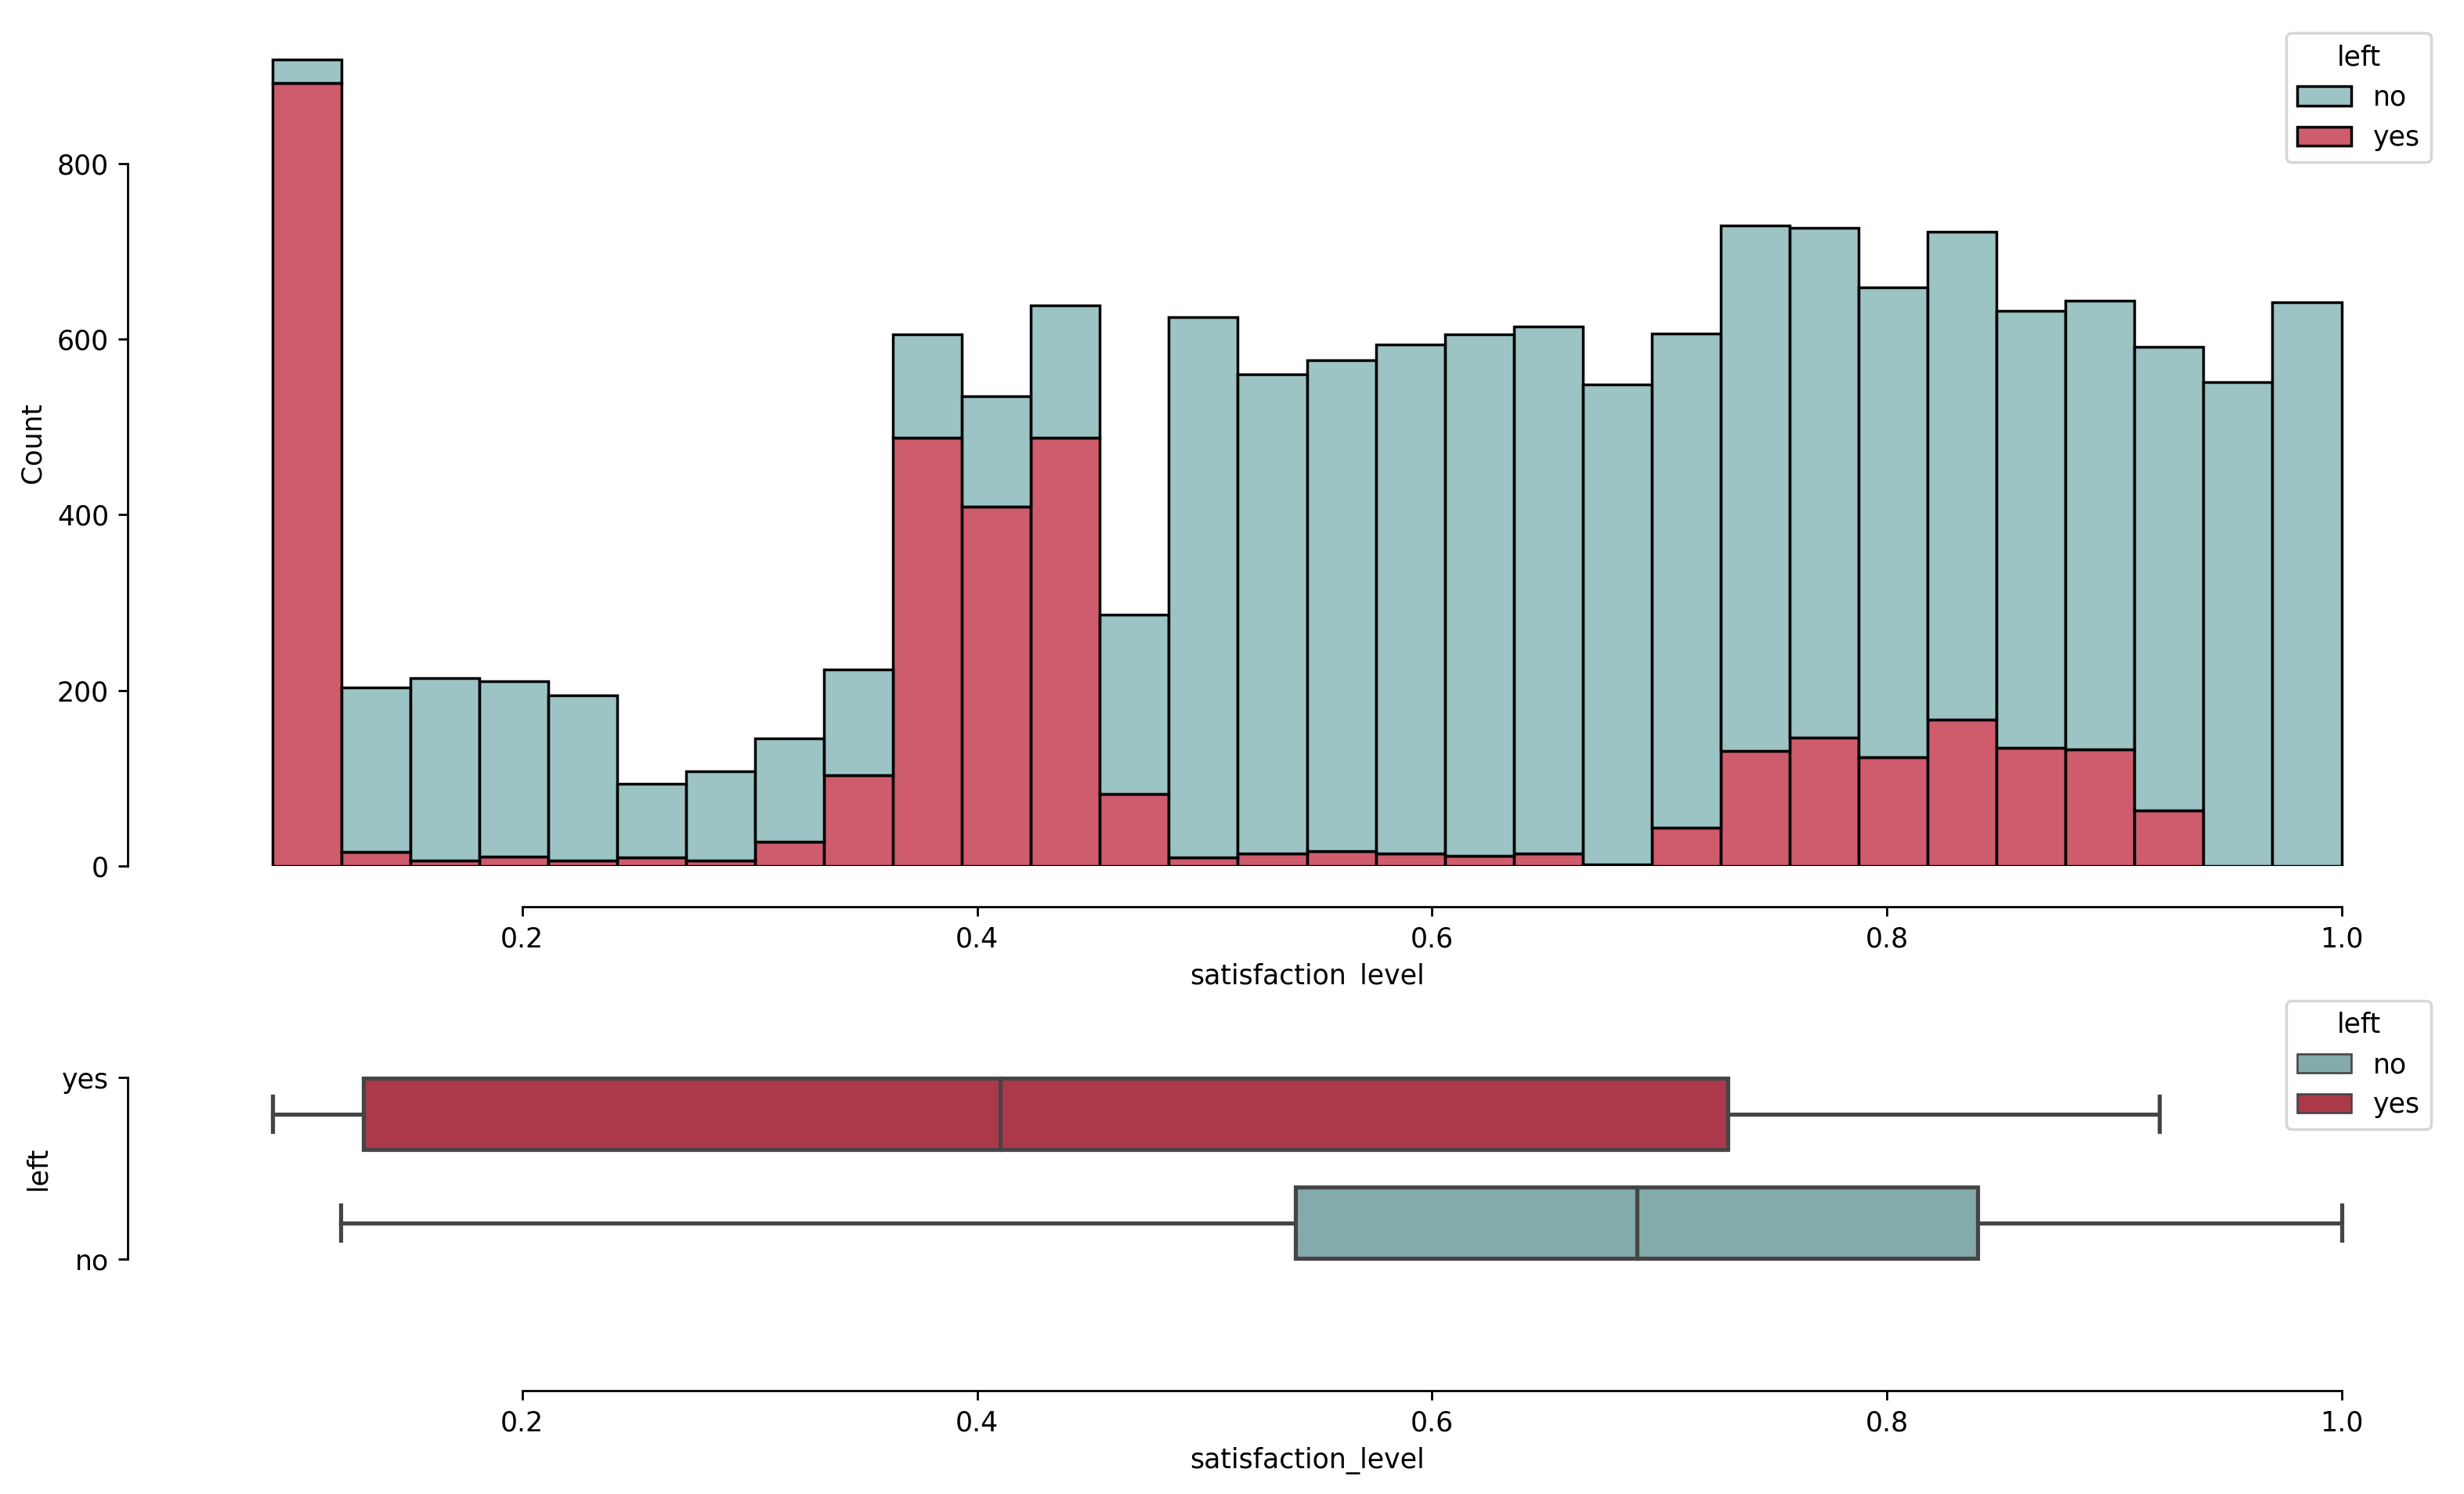

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(15,9),
    gridspec_kw={'height_ratios':(0.70,0.30)}
)
sns.histplot(
    data=df, x='satisfaction_level', hue='left',
    palette=colors[:2], hue_order=['no', 'yes'],ax=ax[0],
    multiple='stack'
)
sns.boxplot(data=df, x='satisfaction_level',y='left',
            hue='left', hue_order=['no', 'yes'],
            palette=colors[:2], ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

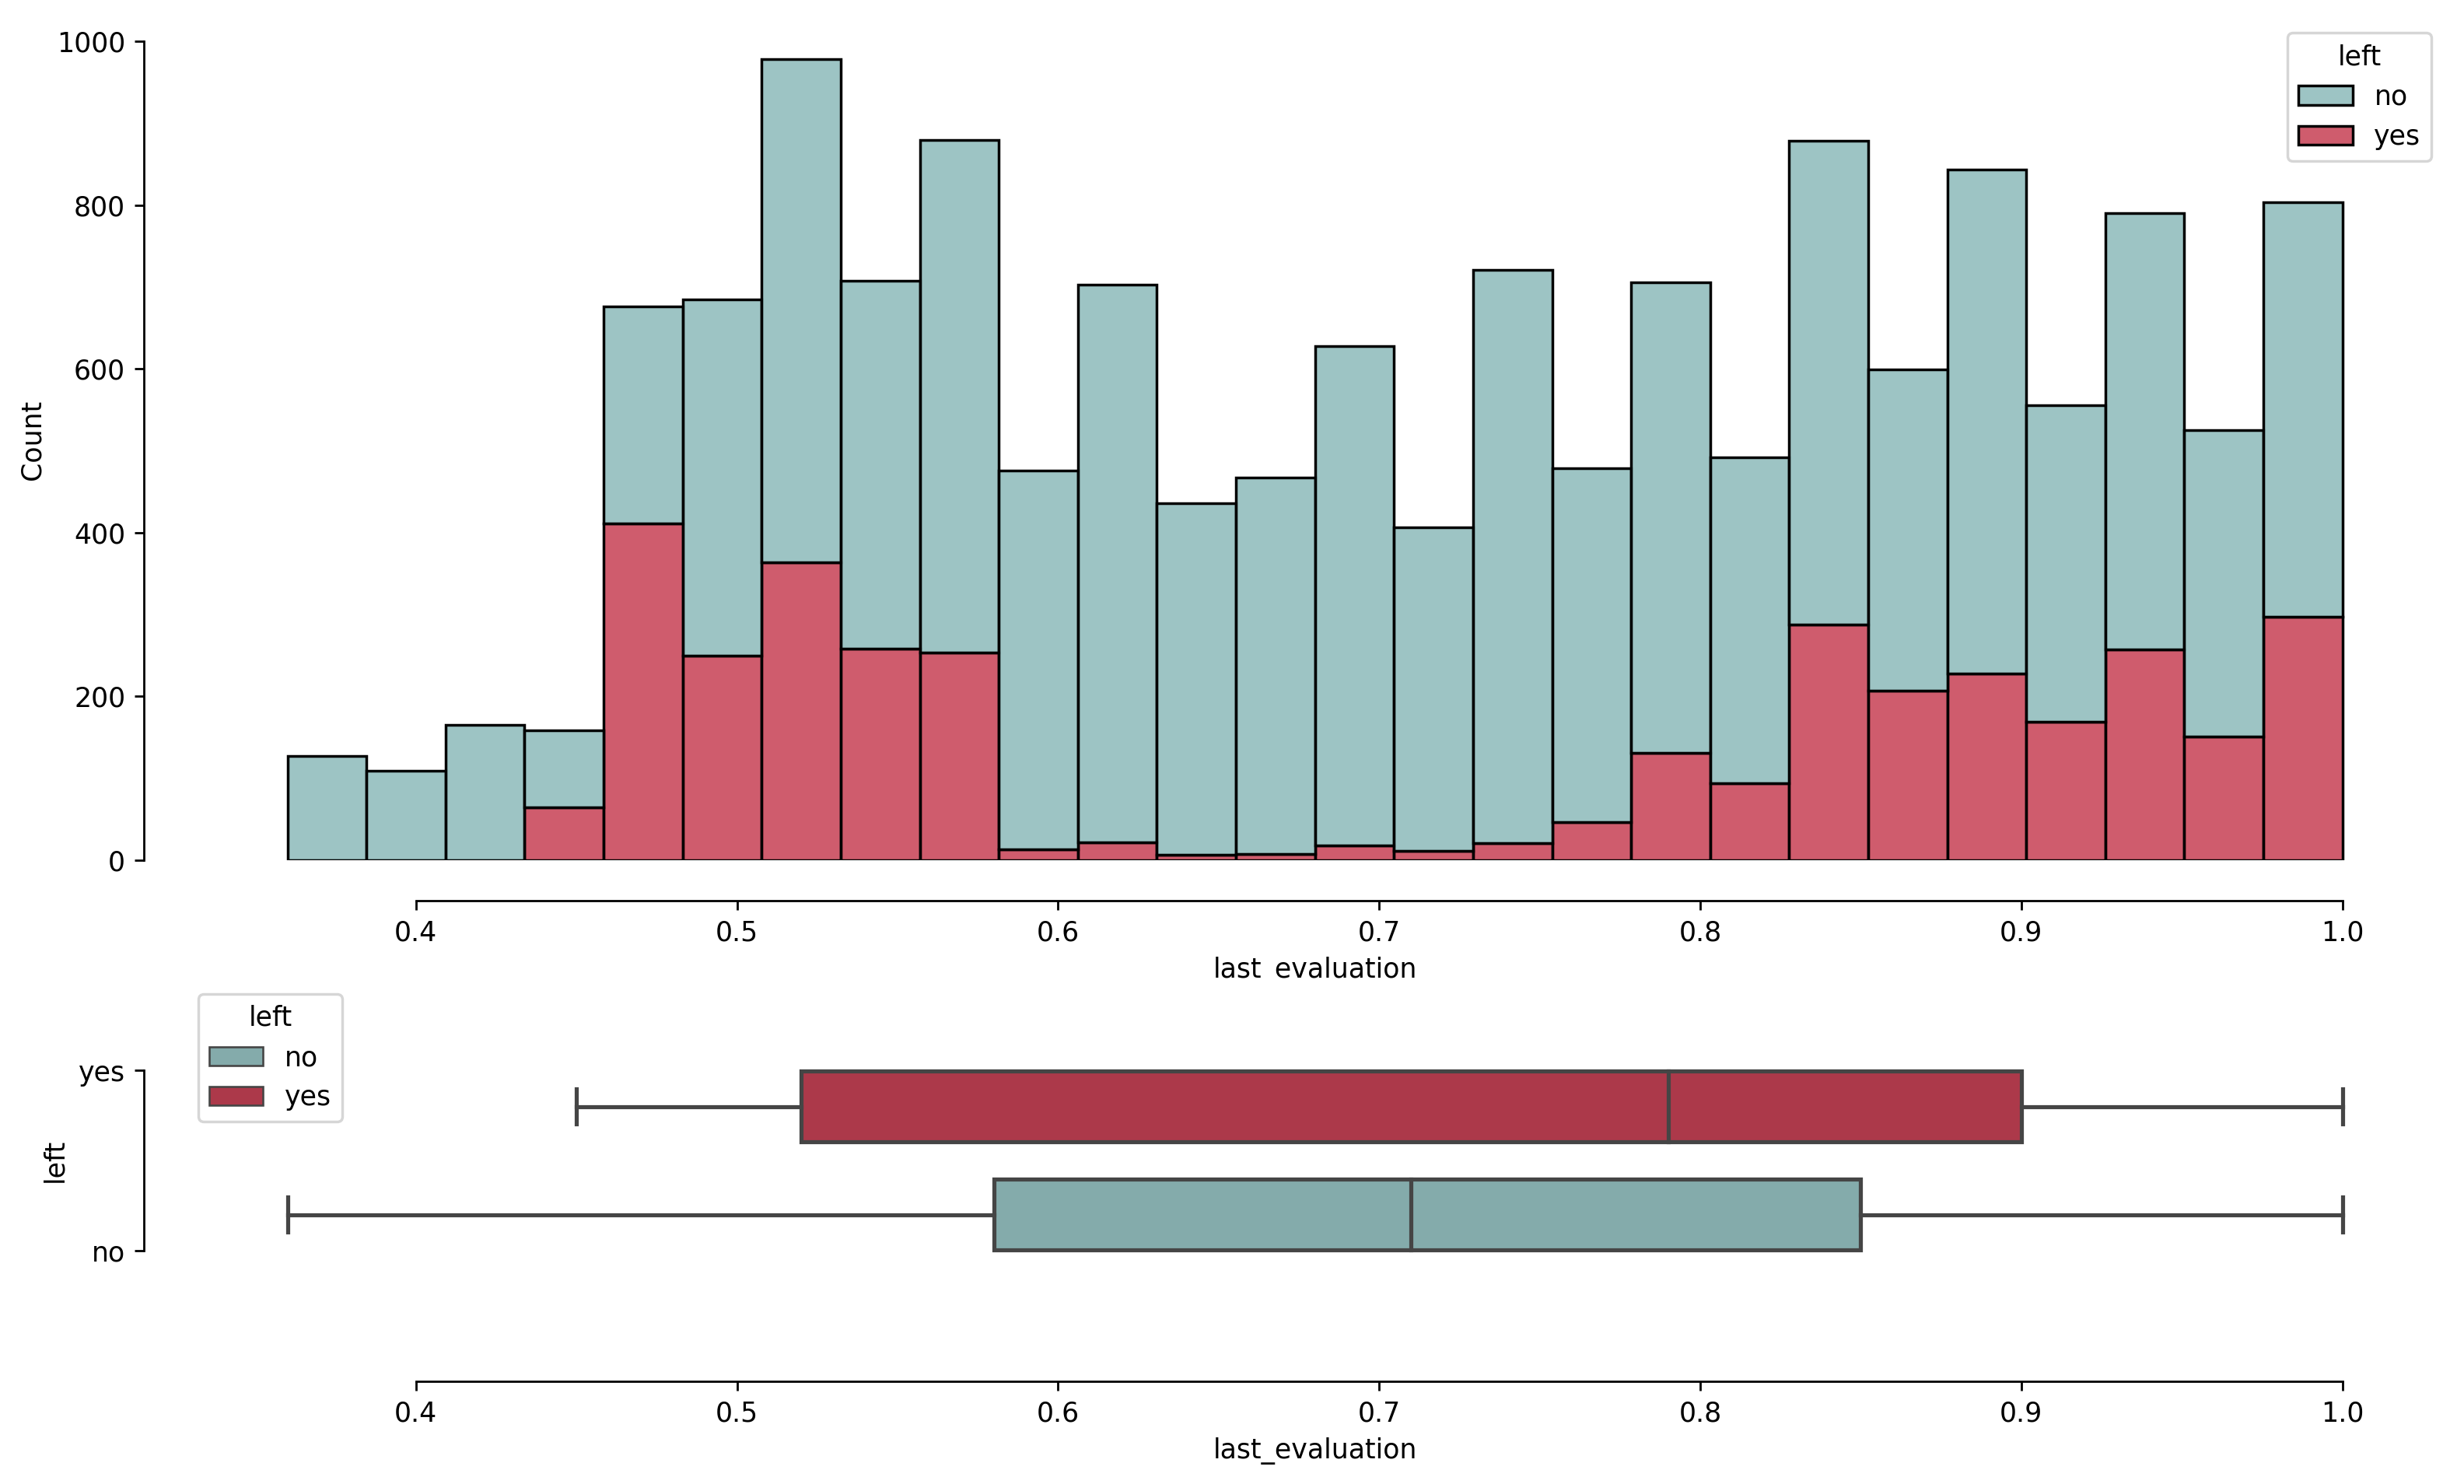

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(15,9),
    gridspec_kw={'height_ratios':(0.70,0.30)}
)
sns.histplot(
    data=df, x='last_evaluation', hue='left',
    palette=colors[:2], hue_order=['no', 'yes'],ax=ax[0],
    multiple='stack'
)
sns.boxplot(data=df, x='last_evaluation',y='left',
            hue='left', hue_order=['no', 'yes'],
            palette=colors[:2], ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

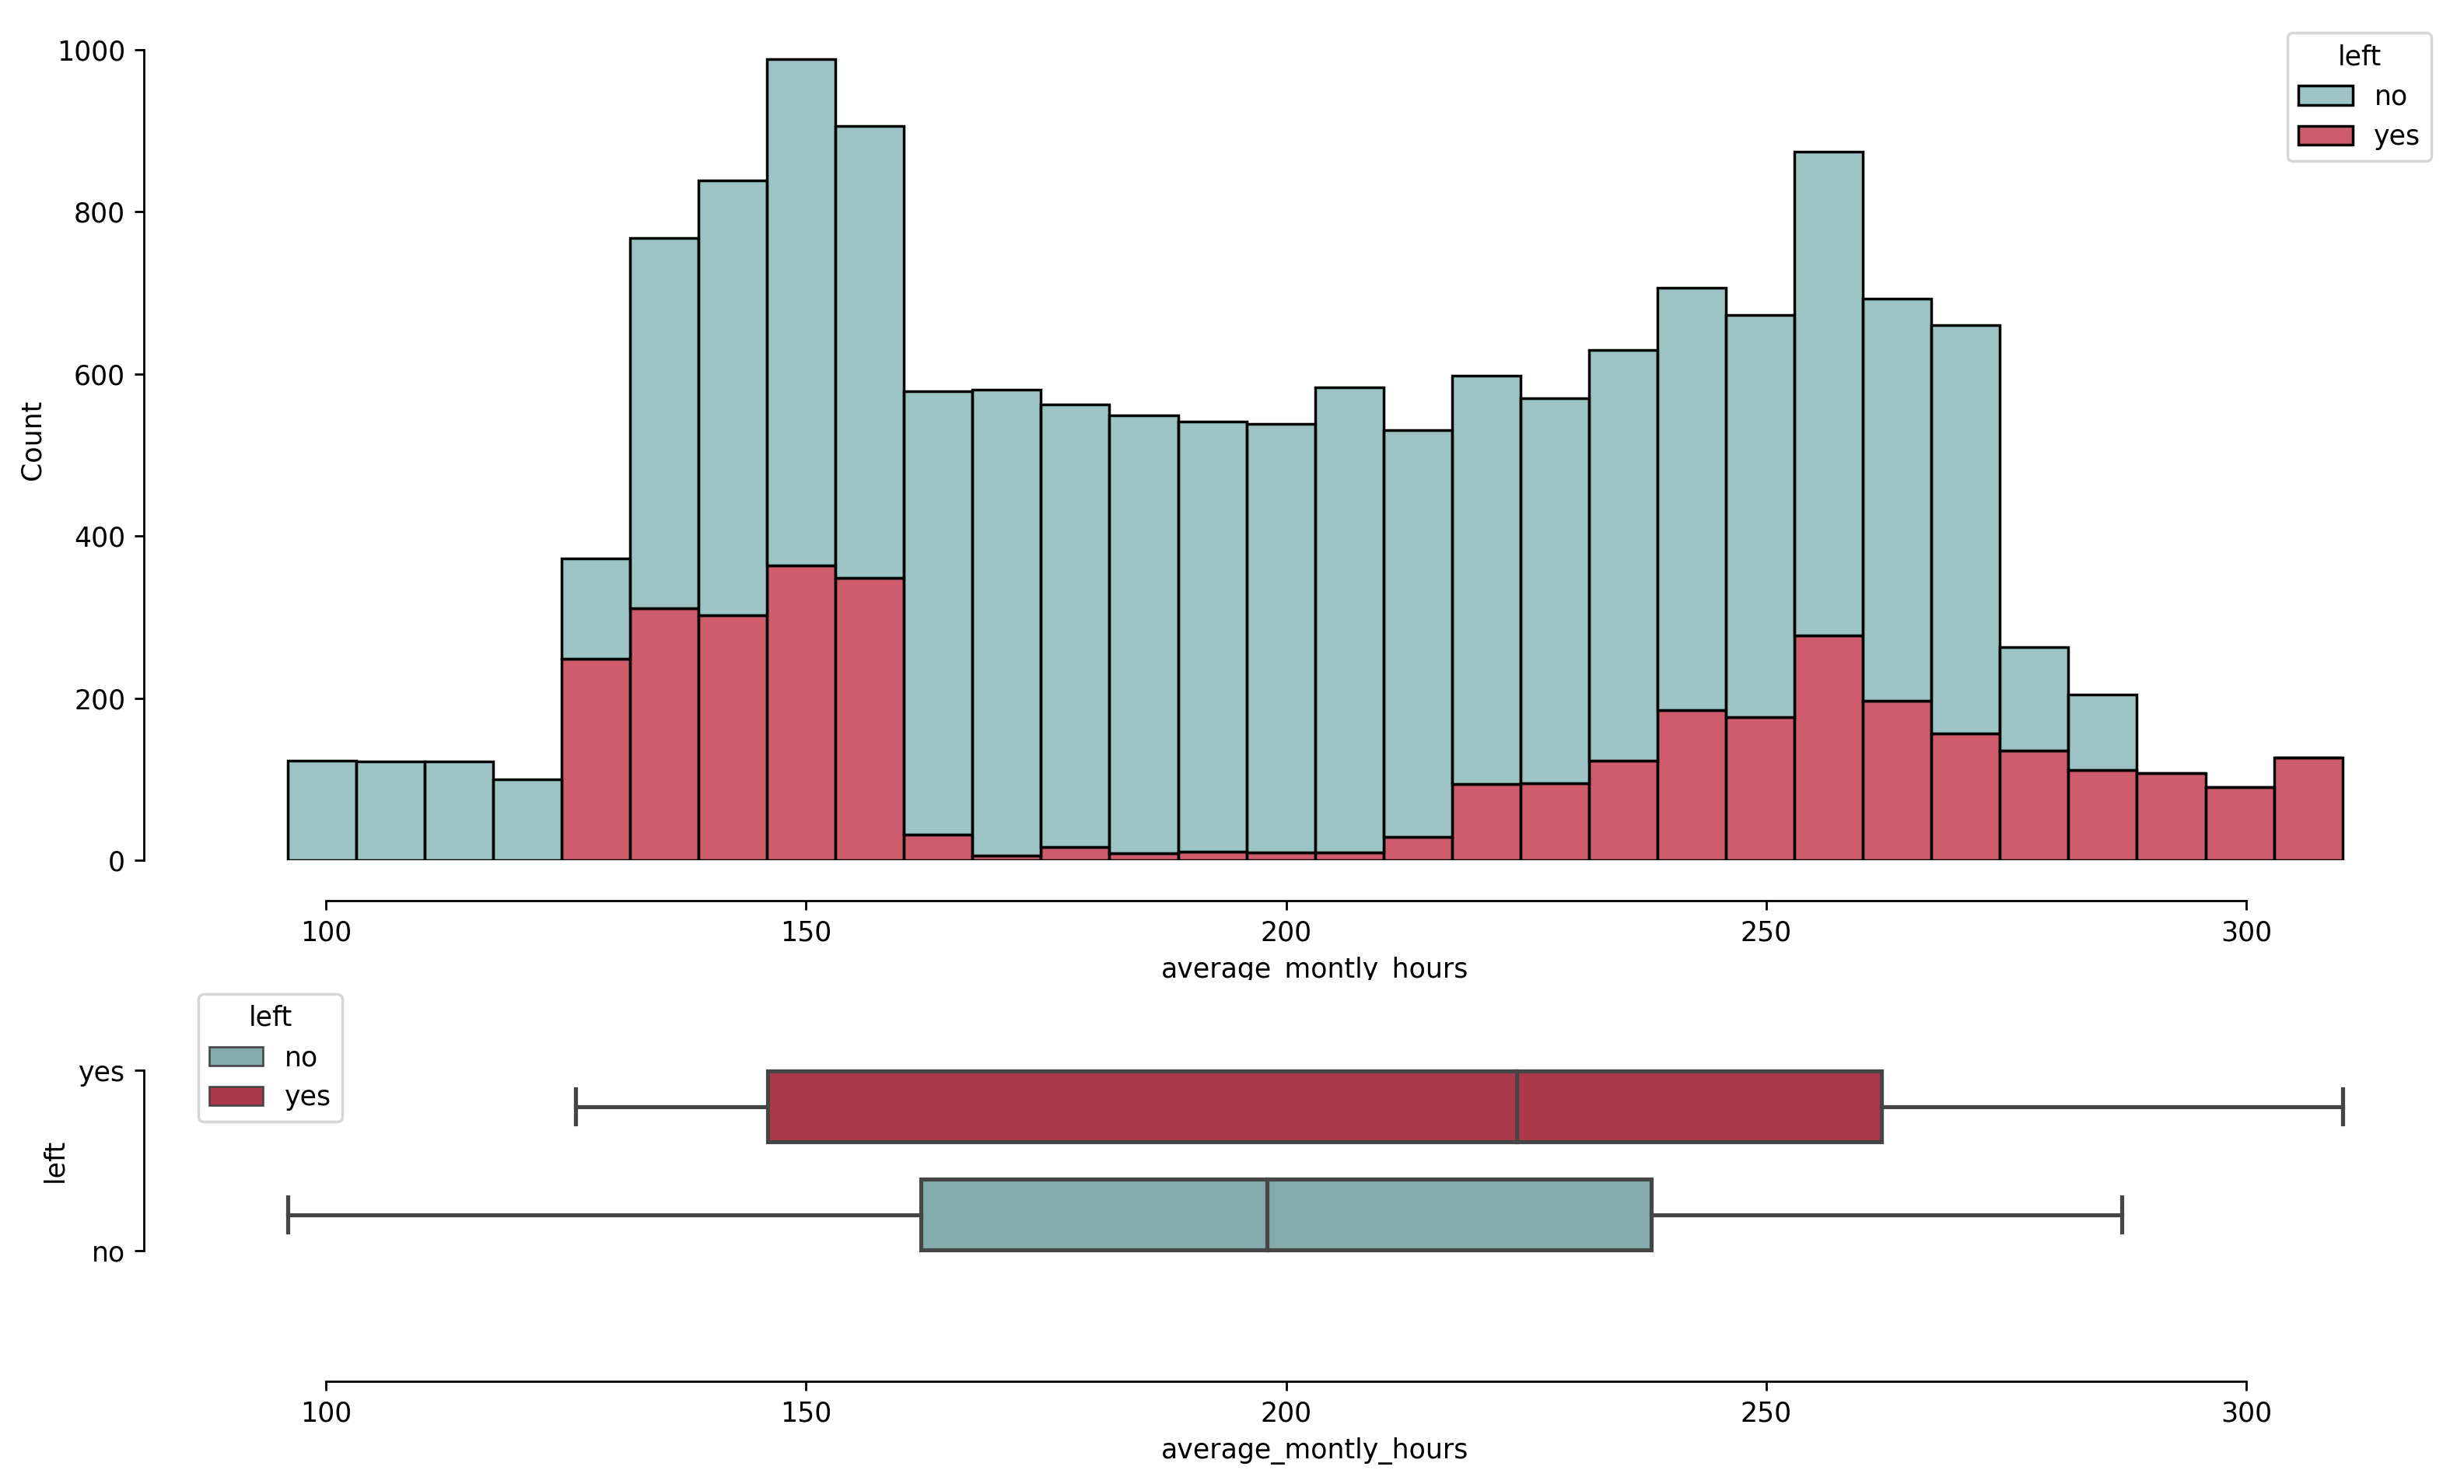

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1, figsize=(15,9),
    gridspec_kw={'height_ratios':(0.70,0.30)}
)
sns.histplot(
    data=df, x='average_montly_hours', hue='left',
    palette=colors[:2], hue_order=['no', 'yes'],ax=ax[0],
    multiple='stack'
)
sns.boxplot(data=df, x='average_montly_hours',y='left',
            hue='left', hue_order=['no', 'yes'],
            palette=colors[:2], ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

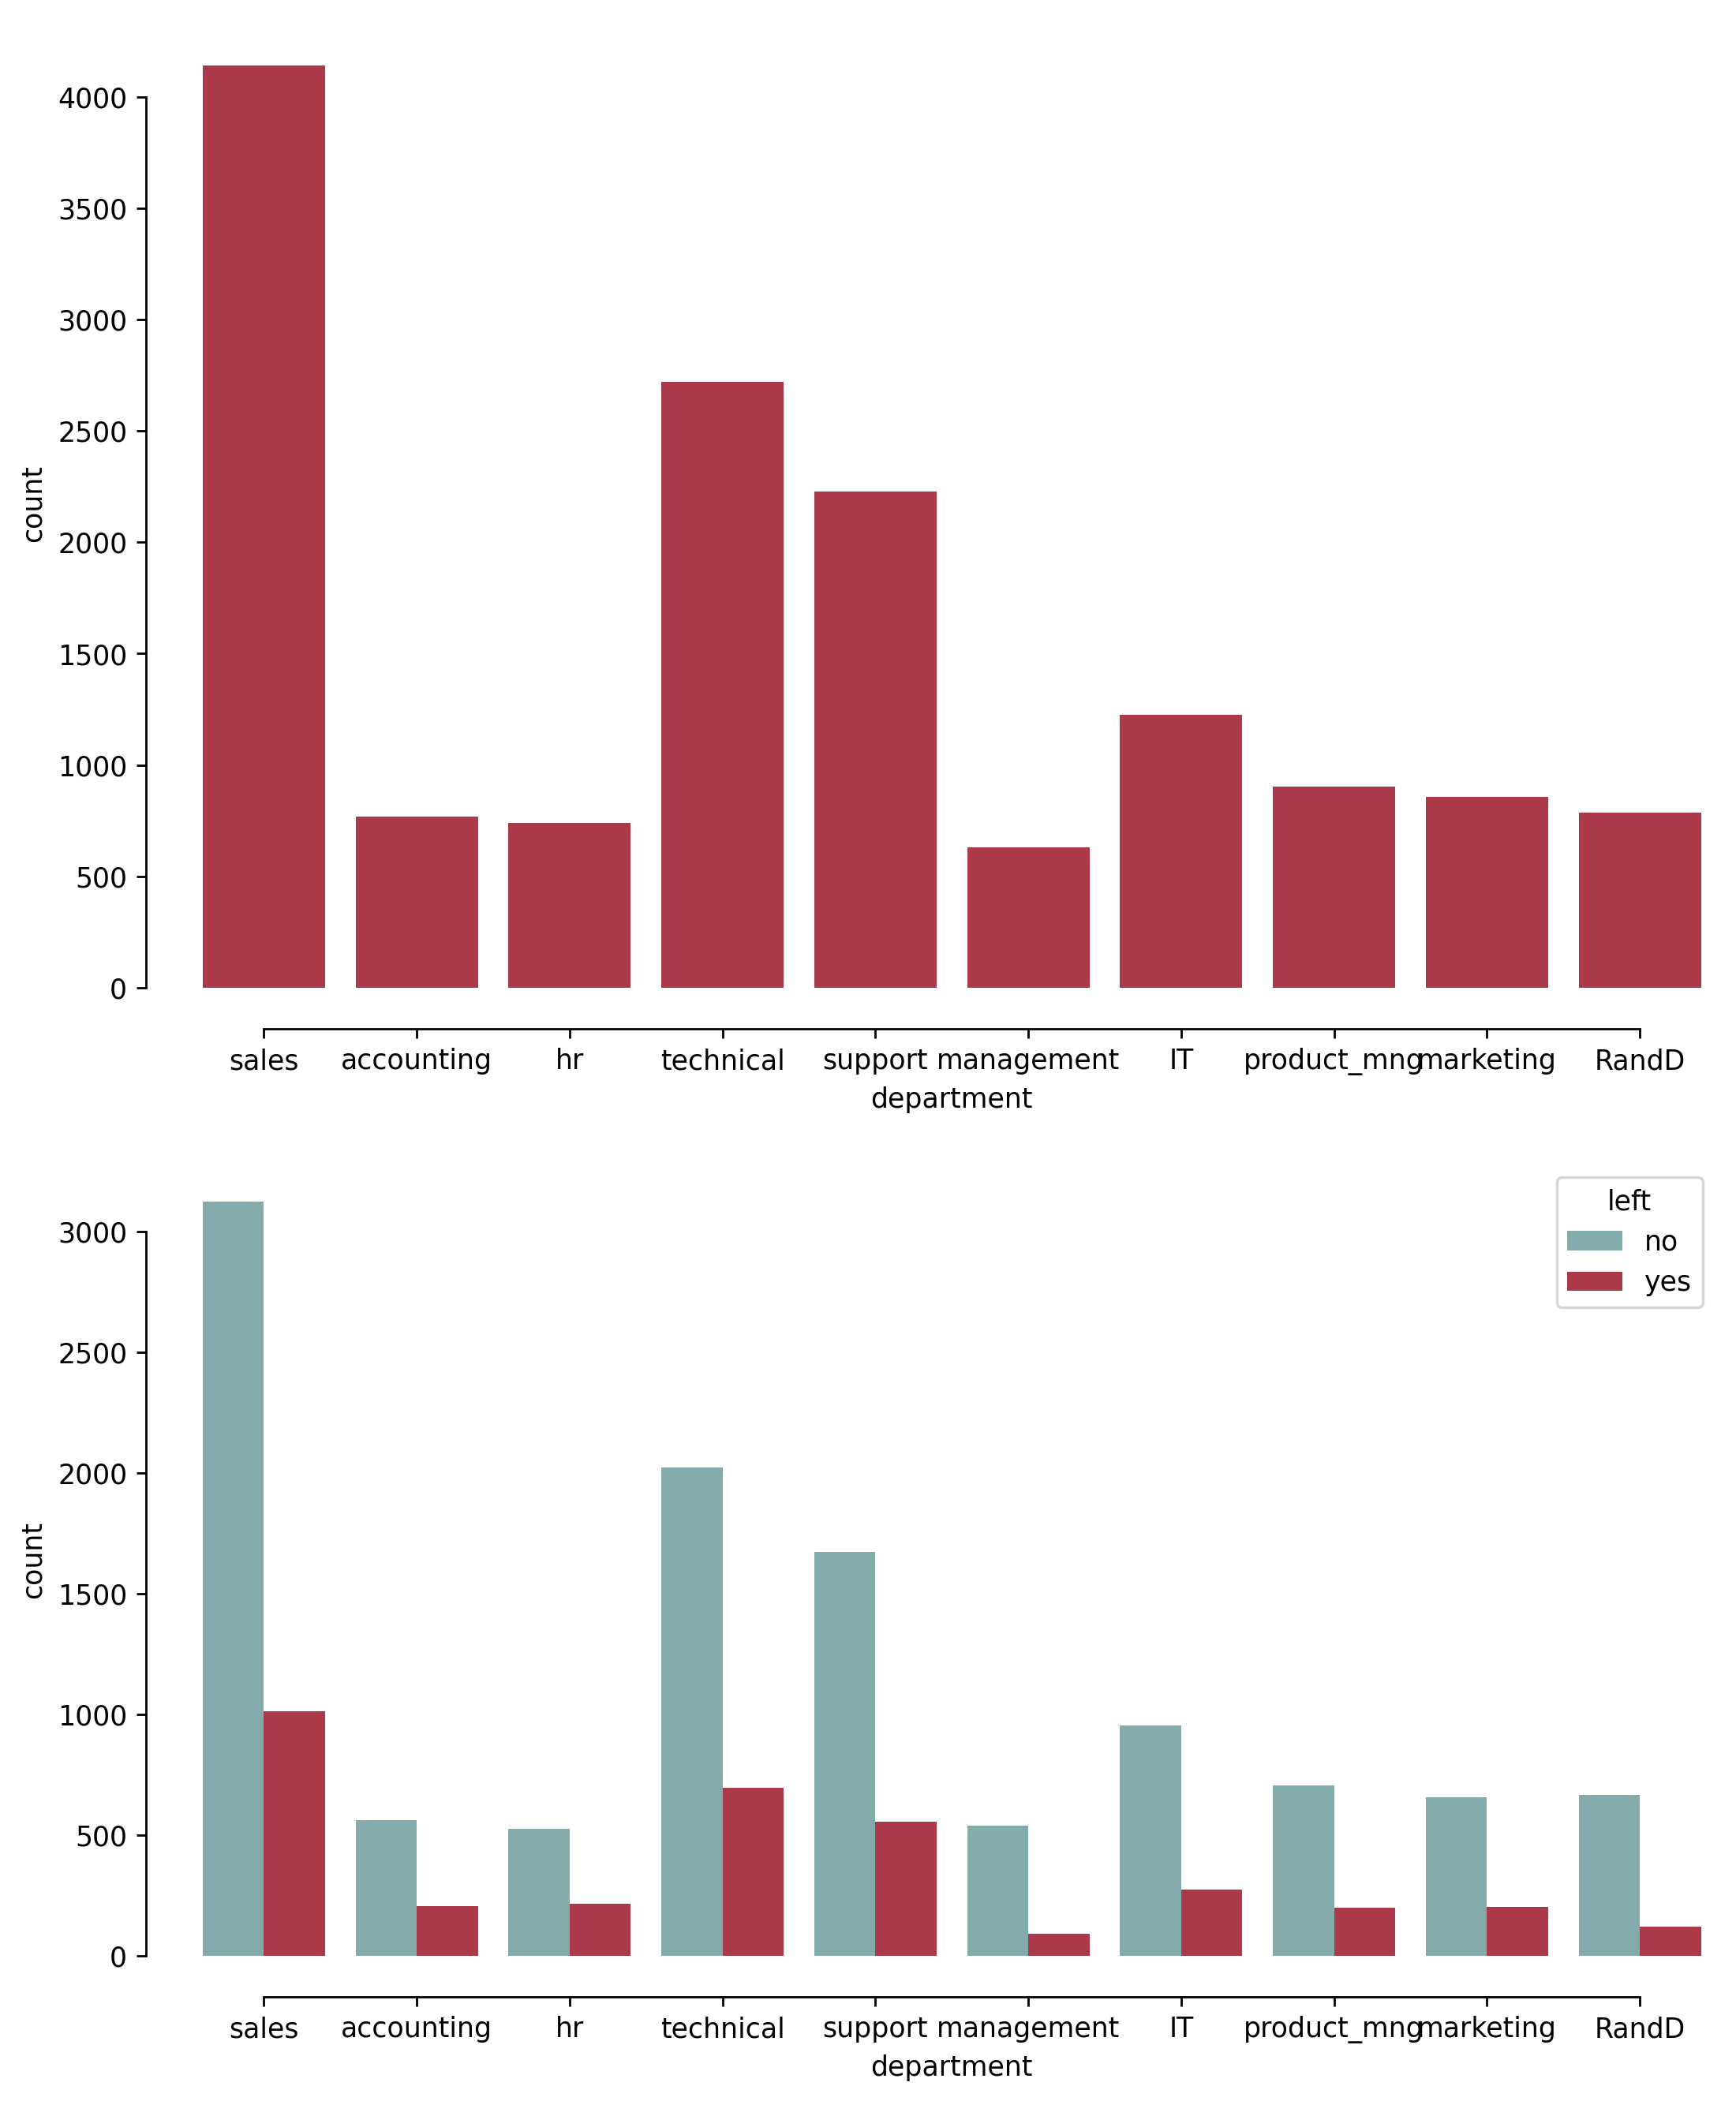

In [ ]:
fig, ax = plt.subplots(
    nrows=2, ncols=1,figsize=(10,13),
    gridspec_kw={'height_ratios':(0.55,0.45)})

sns.countplot(data=df, x='department',
        ax=ax[0], palette=colors[1:2])
sns.countplot(data=df, x='department',
    hue='left', hue_order=['no','yes'], palette=colors[:2],
    ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

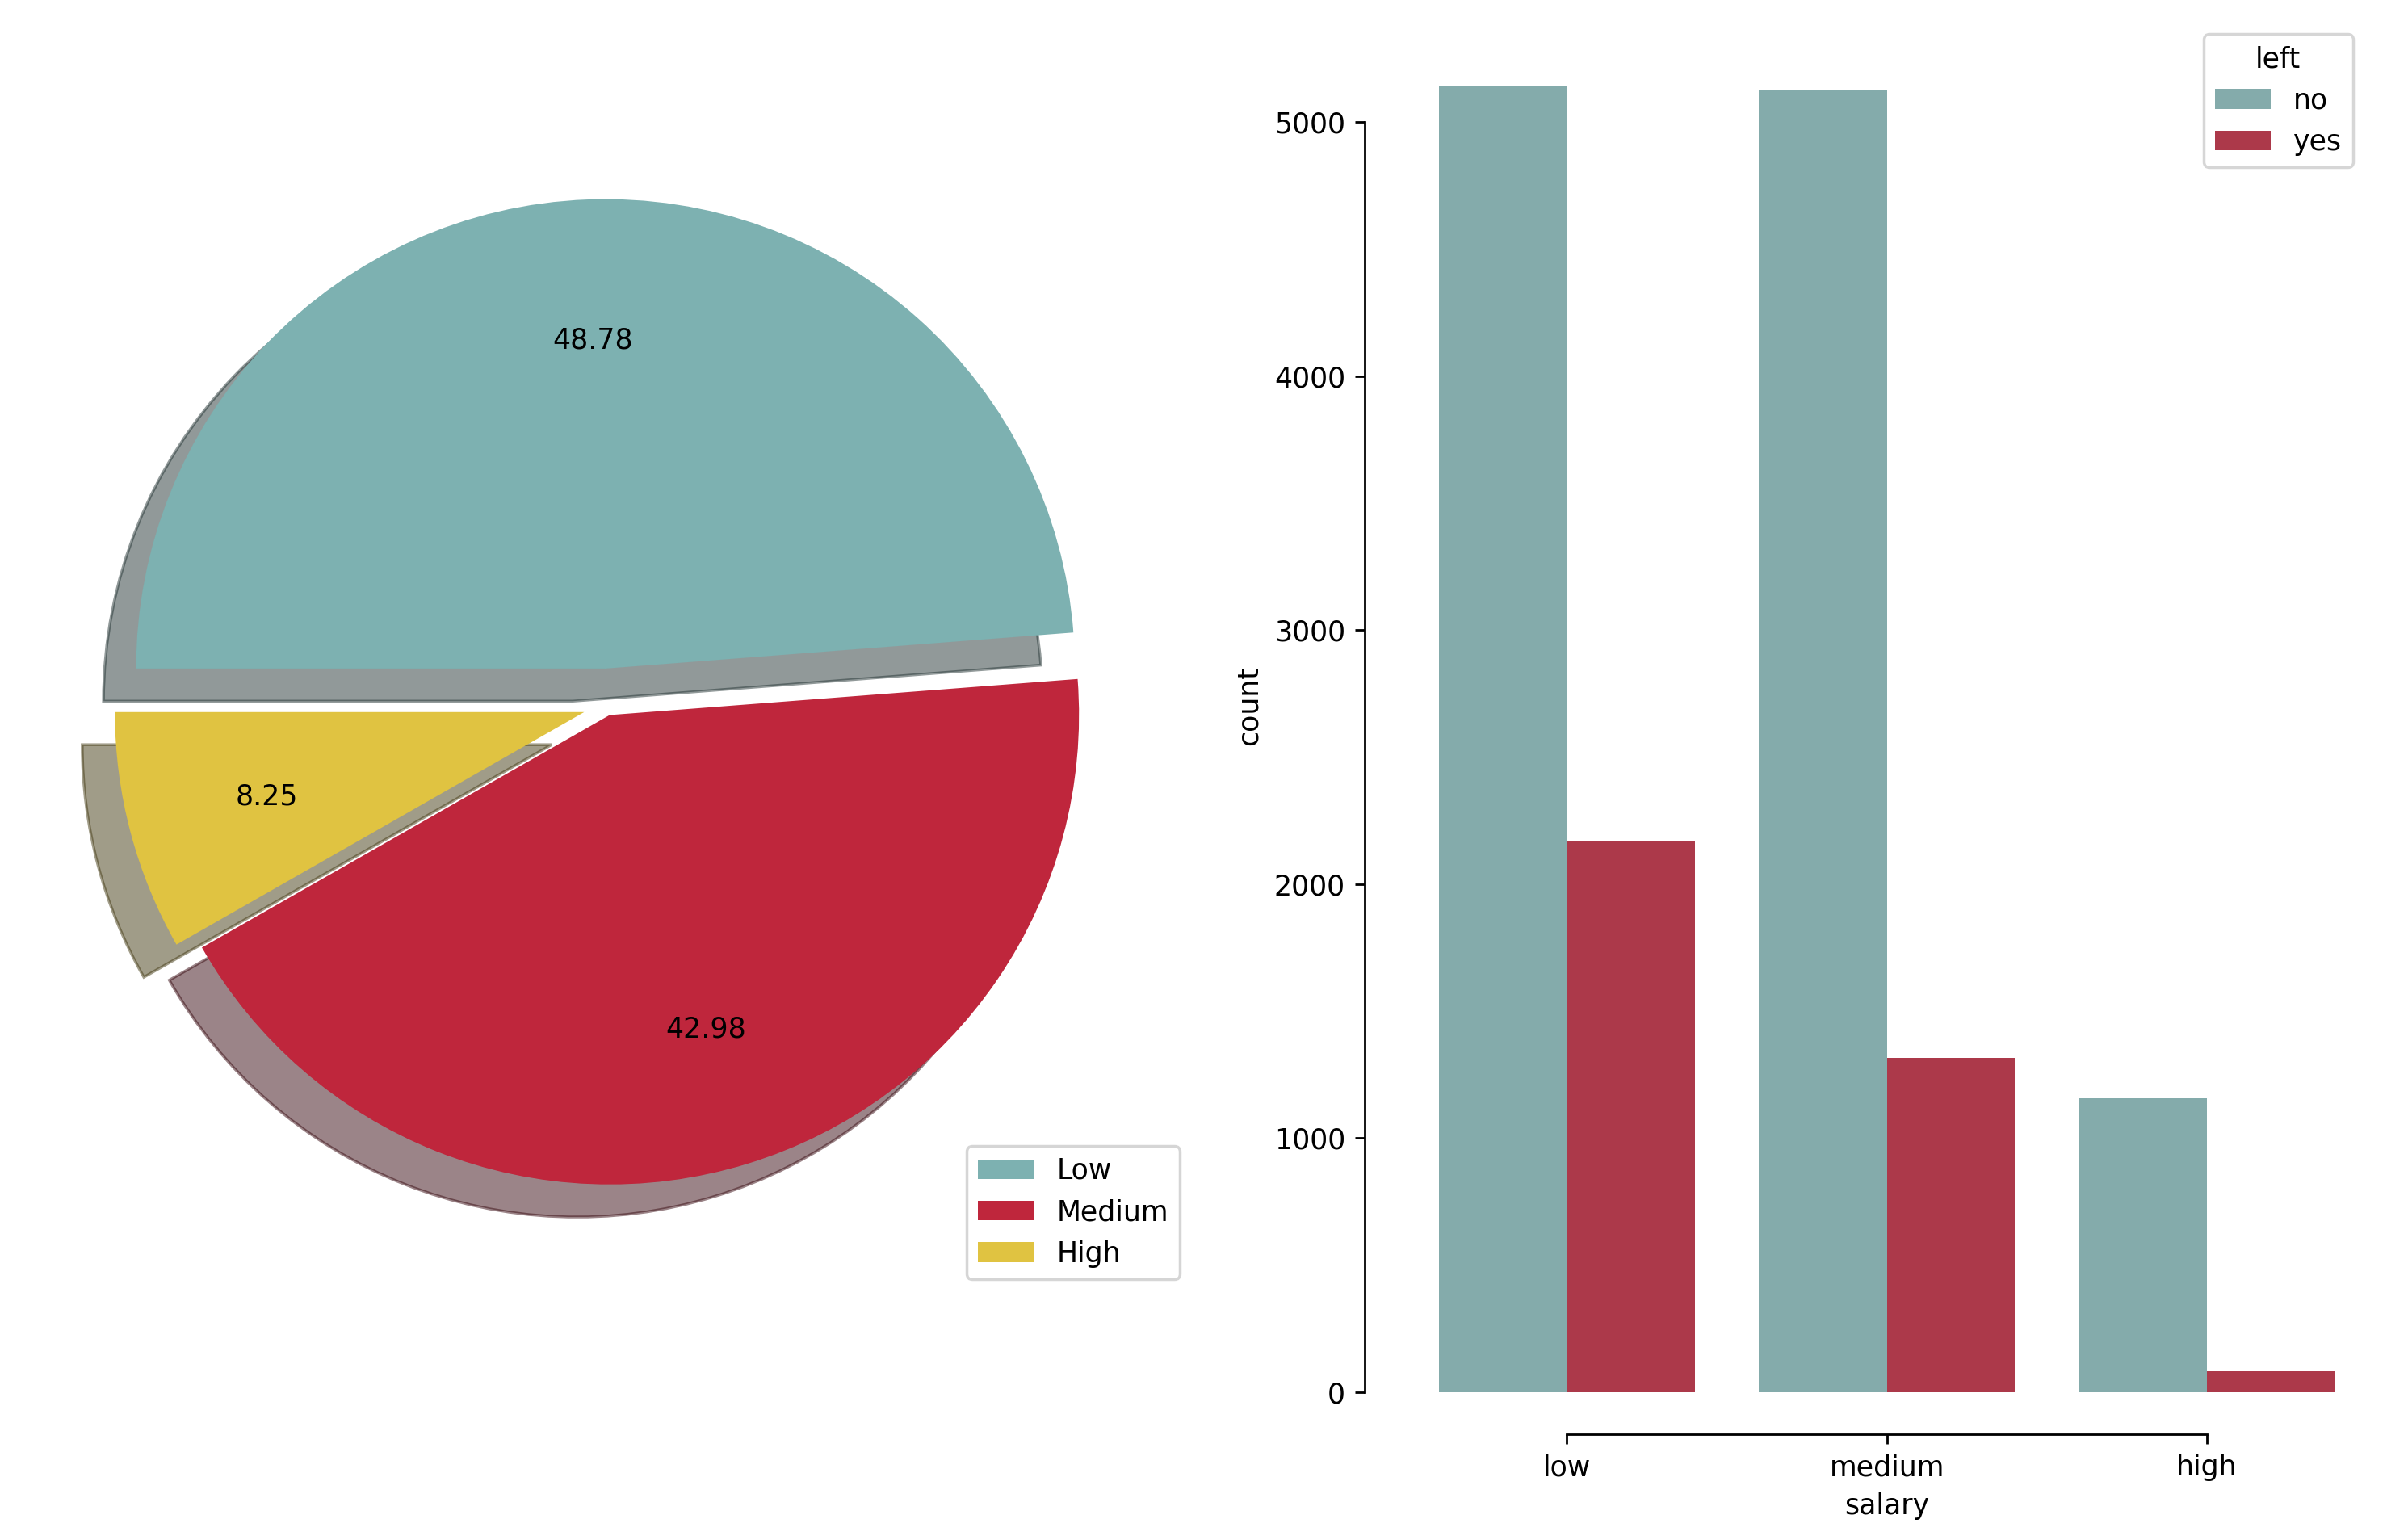

In [ ]:
low = df['salary'].value_counts()['low']
med = df['salary'].value_counts()['medium']
high = df['salary'].value_counts()['high']
vals = [low, med, high]
names = ['Low', 'Medium', 'High']

fig, ax = plt.subplots(nrows=1,ncols=2,
        figsize=(15,9), gridspec_kw={
            'width_ratios':(0.55, 0.45)})
ax[0].pie(x=vals, colors=colors[:3], 
    pctdistance=0.7,autopct='%0.2f', shadow=True,
    explode=(0.08,0.02,0.05), startangle=180, 
    counterclock=False)
ax[0].legend(names, loc='lower right')
sns.countplot(data=df, x='salary',hue='left',
    hue_order=['no', 'yes'], palette=colors[:2],
    ax=ax[1])
sns.despine(offset=15, trim=True)
plt.show()

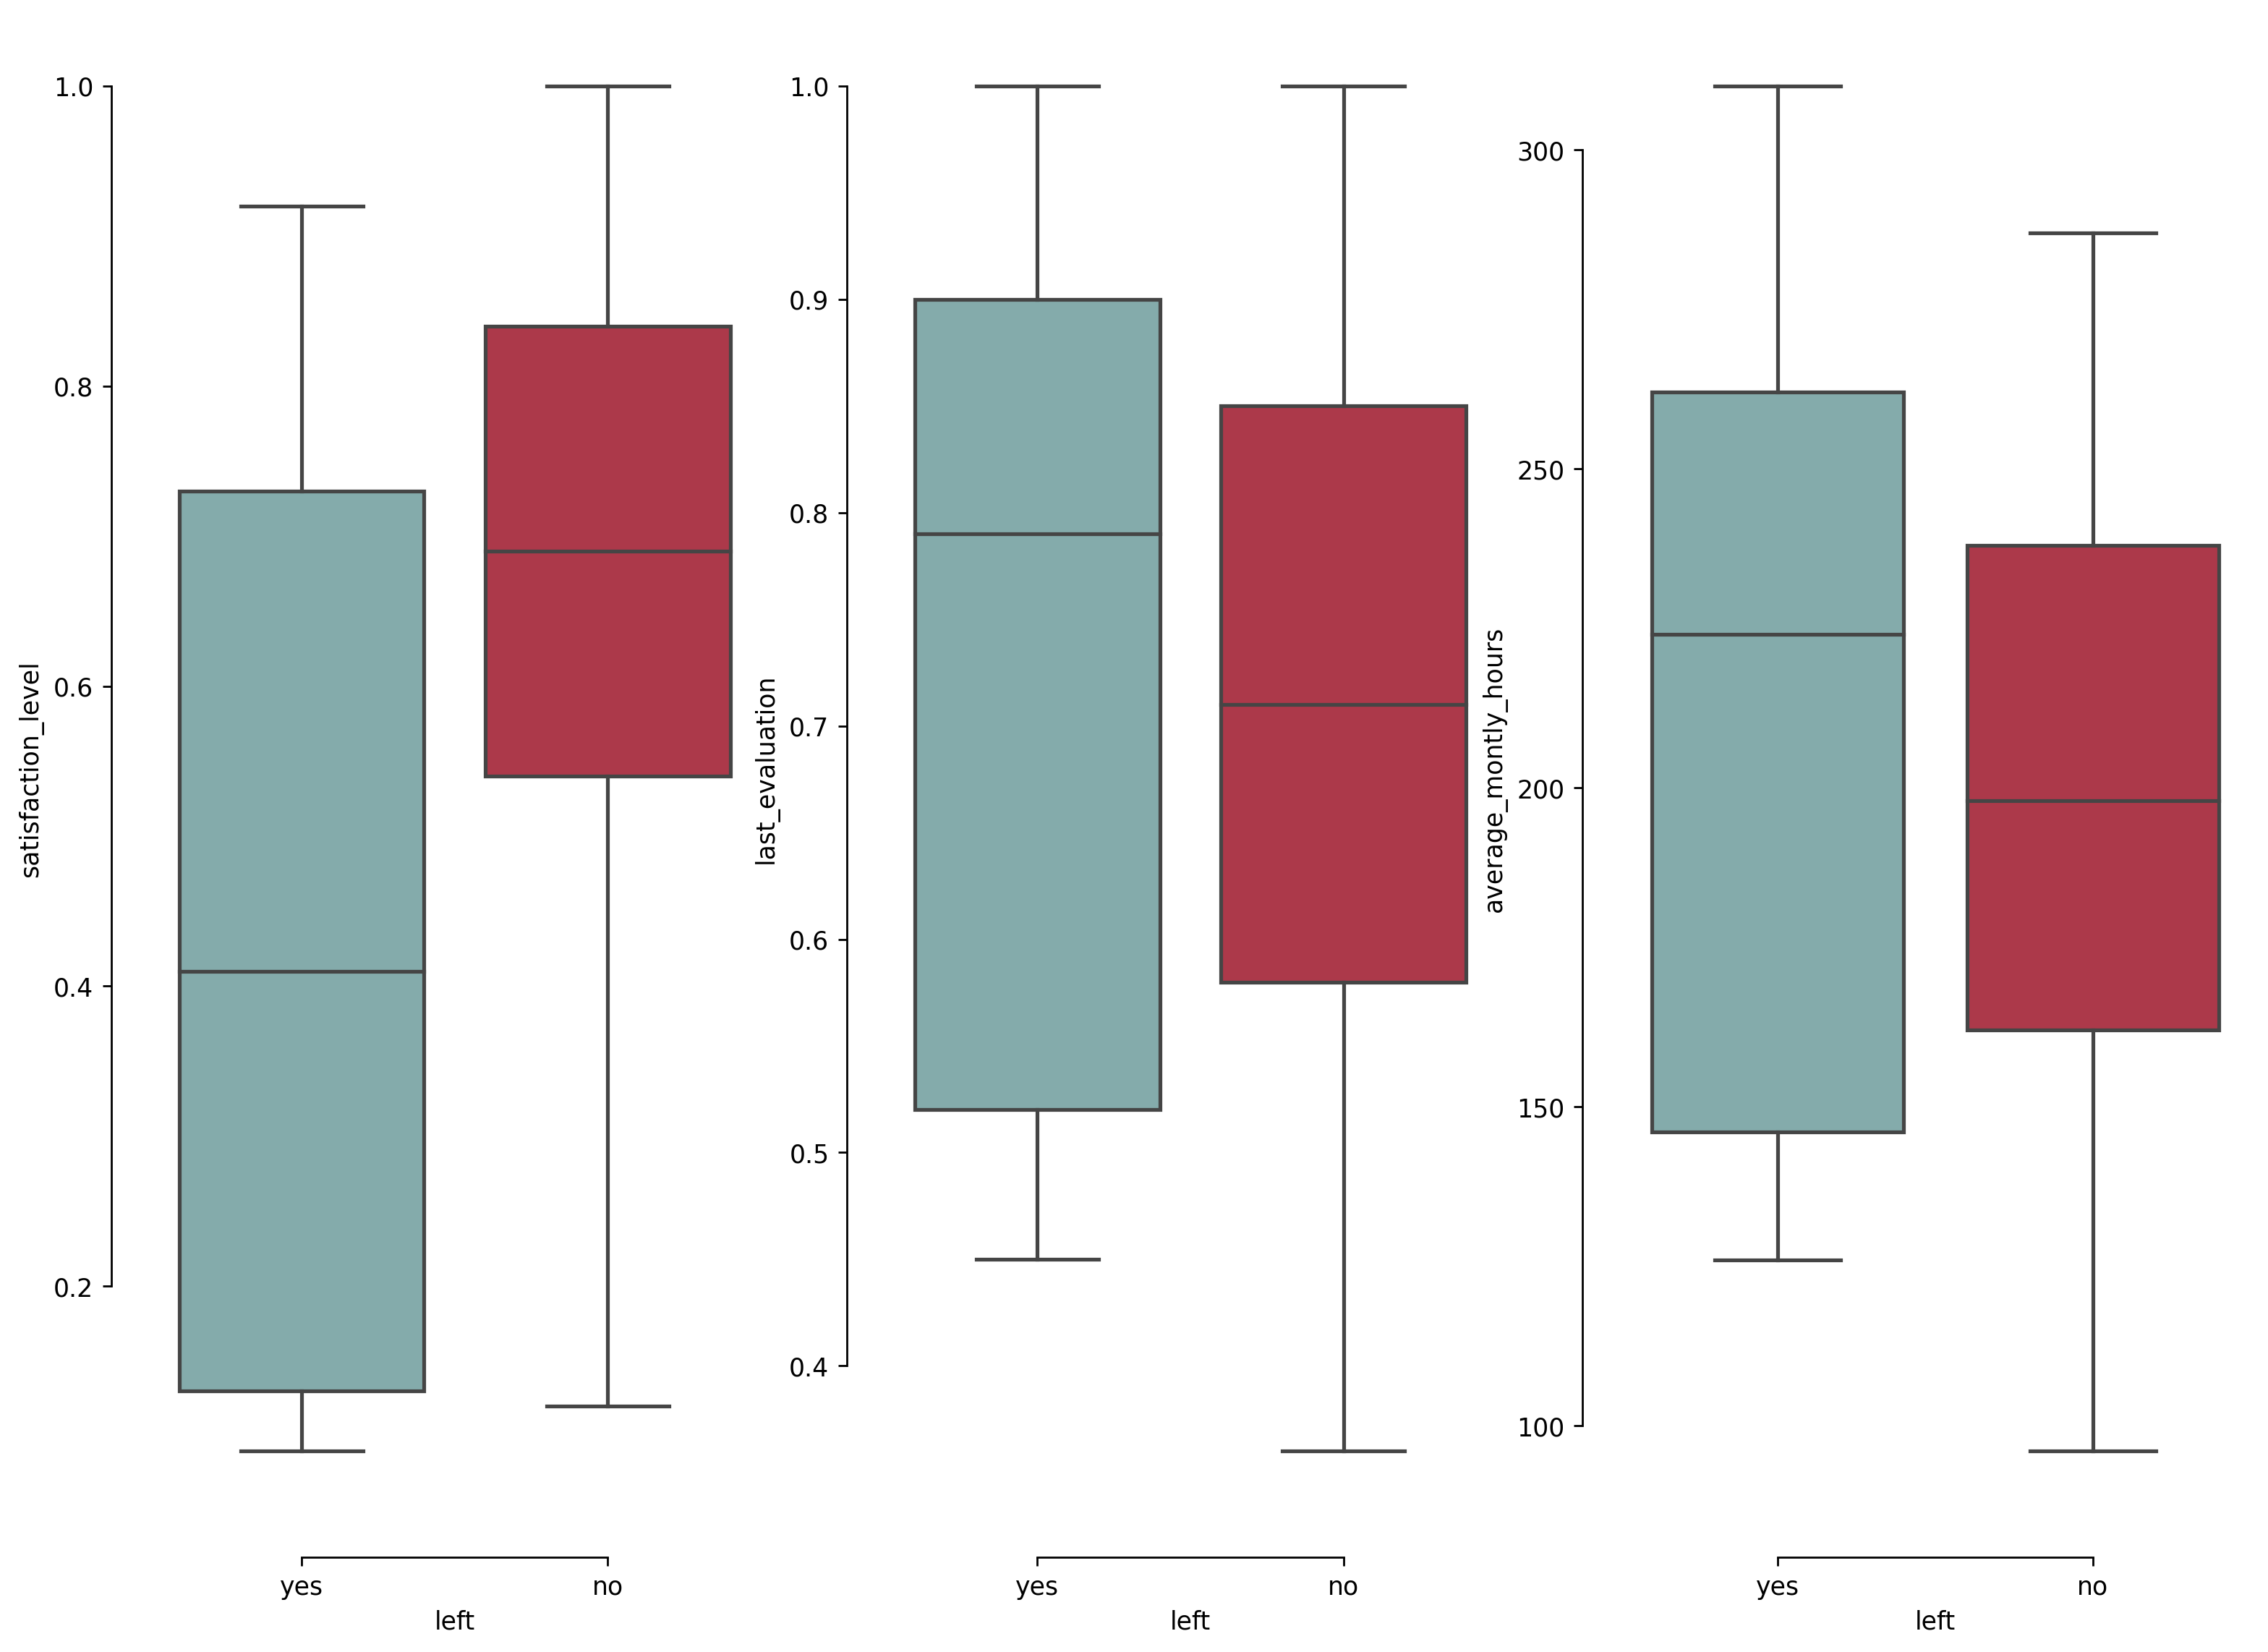

In [ ]:
fig, ax = plt.subplots(nrows=1,ncols=3,
        figsize=(15,11), gridspec_kw={
            'width_ratios':(0.33,0.33, 0.34)})
sns.boxplot(data=df,x='left',y='satisfaction_level',
            ax=ax[0], palette=colors[:2])
sns.boxplot(data=df,x='left',y='last_evaluation',
            ax=ax[1], palette=colors[:2])
sns.boxplot(data=df,x='left',y='average_montly_hours',
            ax=ax[2], palette=colors[:2])
sns.despine(offset=15, trim=True)

## Feature Importance Analysis:

In [ ]:
pd.crosstab(
    df['department'], df['left'],
    normalize='index', margins=True
)

left,no,yes
department,,
IT,0.777506,0.222494
RandD,0.846252,0.153748
accounting,0.734029,0.265971
hr,0.709066,0.290934
management,0.855556,0.144444
marketing,0.763403,0.236597
product_mng,0.780488,0.219512
sales,0.755072,0.244928
support,0.751009,0.248991


In [ ]:
left_encoded = {'no':0, 'yes':1}
df['left'] = df['left'].apply(lambda x: left_encoded[x])

In [ ]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [ ]:
global_mean = df['left'].mean()

sales_mean = df[df['department']=='sales']['left'].mean()
technical_mean = df[df['department']=='technical']['left'].mean()
support_mean = df[df['department']=='support']['left'].mean()
it_mean = df[df['department']=='IT']['left'].mean()
product_mean = df[df['department']=='product_mng']['left'].mean()
market_mean = df[df['department']=='marketing']['left'].mean()
ran_mean = df[df['department']=='RandD']['left'].mean()
acc_mean = df[df['department']=='accounting']['left'].mean()
hr_mean  = df[df['department']=='hr']['left'].mean()
mang_mean = df[df['department']=='management']['left'].mean()

In [ ]:
values = [['sales', sales_mean, round(sales_mean/global_mean,3)],
          ['technical', technical_mean, round(technical_mean/global_mean,3)],
          ['support', support_mean, round(support_mean/global_mean,3)],
          ['IT', it_mean, round(it_mean/global_mean,3)],
          ['product', product_mean, round(product_mean/global_mean,3)],
          ['marketing', market_mean, round(market_mean/global_mean,3)],
          ['retail', ran_mean, round(ran_mean/global_mean,3)],
          ['accounting', acc_mean, round(acc_mean/global_mean,3)],
          ['HR', hr_mean, round(hr_mean/global_mean,3)],
          ['management', mang_mean, round(mang_mean/global_mean,3)],
          ['global_mean', global_mean, 1]]

dep_ratio_df = pd.DataFrame(values,
        columns=['department', 'values', 'risk ratio'])

dep_ratio_df




,department,values,risk ratio
0,sales,0.244928,1.029
1,technical,0.256250,1.076
2,support,0.248991,1.046
3,IT,0.222494,0.935
4,product,0.219512,0.922
5,marketing,0.236597,0.994
6,retail,0.153748,0.646
7,accounting,0.265971,1.117
8,HR,0.290934,1.222
9,management,0.144444,0.607


In [ ]:
sal_medium = df[df['salary']=='medium']['left'].mean()
sal_high = df[df['salary']=='high']['left'].mean()
sal_low = df[df['salary']=='low']['left'].mean()

In [ ]:
values = [['low',sal_low, round(sal_low/global_mean,3)],
          ['medium',sal_medium, round(sal_medium/global_mean,3)],
          ['high', sal_high, round(sal_high/global_mean,3)],
          ['global mean', global_mean, 1]]
sal_risk_df = pd.DataFrame(values, 
        columns=['salary categories','values', 'risk ratio'])
sal_risk_df

,salary categories,values,risk ratio
0,low,0.296884,1.247
1,medium,0.204313,0.858
2,high,0.066289,0.278
3,global mean,0.238083,1.000


In [ ]:
promoted_yes = df[df['promotion_last_5years']=='yes']['left'].mean()
print(f'Promoted = Yes:{round(promoted_yes,3)},\
Risk Ratio: {round(promoted_yes/ global_mean,3)}')

promoted_no = df[df['promotion_last_5years']=='no']['left'].mean()
print(f'Promoted = No: {round(promoted_no,3)},\
Risk Ratio: {round(promoted_no/global_mean,3)}')

Promoted = Yes:0.06,Risk Ratio: 0.25
Promoted = No: 0.242,Risk Ratio: 1.016


In [ ]:
from IPython.display import display

cat_cols = ['department', 'promotion_last_5years','salary', 'work_accident',
            'number_project']

for col in cat_cols:
    df_group = df.groupby(by=col)['left'].agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
department,,,
IT,0.222494,-0.015589,0.934524
RandD,0.153748,-0.084334,0.645778
accounting,0.265971,0.027889,1.117139
hr,0.290934,0.052851,1.221987
management,0.144444,-0.093638,0.606699
marketing,0.236597,-0.001486,0.993759
product_mng,0.219512,-0.018570,0.922000
sales,0.244928,0.006845,1.028751
support,0.248991,0.010908,1.045816


,mean,diff,risk
promotion_last_5years,,,
no,0.241962,0.003879,1.016294
yes,0.059561,-0.178521,0.250170


,mean,diff,risk
salary,,,
high,0.066289,-0.171793,0.278430
low,0.296884,0.058801,1.246977
medium,0.204313,-0.033770,0.858159


,mean,diff,risk
work_accident,,,
no,0.265160,0.027077,1.113730
yes,0.077916,-0.160166,0.327265


,mean,diff,risk
number_project,,,
2,0.656198,0.418115,2.756177
3,0.017756,-0.220327,0.074579
4,0.093700,-0.144383,0.393561
5,0.221659,-0.016424,0.931017
6,0.557922,0.319839,2.343396
7,1.000000,0.761917,4.200224


In [ ]:
left_encoded ={0:'no',1:'yes'}
df['left'] = df['left'].apply(
    lambda x: left_encoded[x]
)

In [ ]:
df.loc[df['last_evaluation'] <=0.6].groupby(
    ['left','salary']
).count().T

left                    no               yes            
salary                high   low medium high  low medium
satisfaction_level     344  1485   1519   54  986    575
last_evaluation        344  1485   1519   54  986    575
number_project         344  1485   1519   54  986    575
average_montly_hours   344  1485   1519   54  986    575
time_spend_company     344  1485   1519   54  986    575
work_accident          344  1485   1519   54  986    575
promotion_last_5years  344  1485   1519   54  986    575
department             344  1485   1519   54  986    575

## Trend Analysis:

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(df, x='average_montly_hours',
        y='satisfaction_level', color='left',
            color_discrete_sequence=['#28282b','#8c939c'],
            trendline='ols', facet_col='left',
            title='Relationship Trend:Satisfaction level vs Average Monthly Hour')
fig.update_layout(plot_bgcolor='whitesmoke')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
fig = px.scatter(df, x='satisfaction_level',
                 y='last_evaluation',opacity=0.4,
                 color_discrete_sequence=['#28282b'],
                 marginal_x='box',marginal_y='violin',
                 title='Relationship Density:Evaluation vs Satisfaction')
fig.update_layout(plot_bgcolor='whitesmoke')
fig.update_traces(marker={'size':9})
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
fig = px.scatter(df, x='satisfaction_level',
                 y='average_montly_hours',opacity=0.4,
                 color_discrete_sequence=['#28282b'],
                 marginal_x='box',marginal_y='violin',
                 title='Relationship Density:Average Monthly Hours vs Satisfaction')
fig.update_layout(plot_bgcolor='whitesmoke')
fig.update_traces(marker={'size':9})
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
fig = px.scatter(df, x='average_montly_hours',
                 y='last_evaluation',opacity=0.4,
                 color_discrete_sequence=['#28282b'],
                 marginal_x='box',marginal_y='violin',
                 title='Relationship Density:Evaluation vs Average Monthly Hours')
fig.update_layout(plot_bgcolor='whitesmoke')
fig.update_traces(marker={'size':9})
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

## Statistical Analysis:

### Emperical Cummulative Destribution Function:

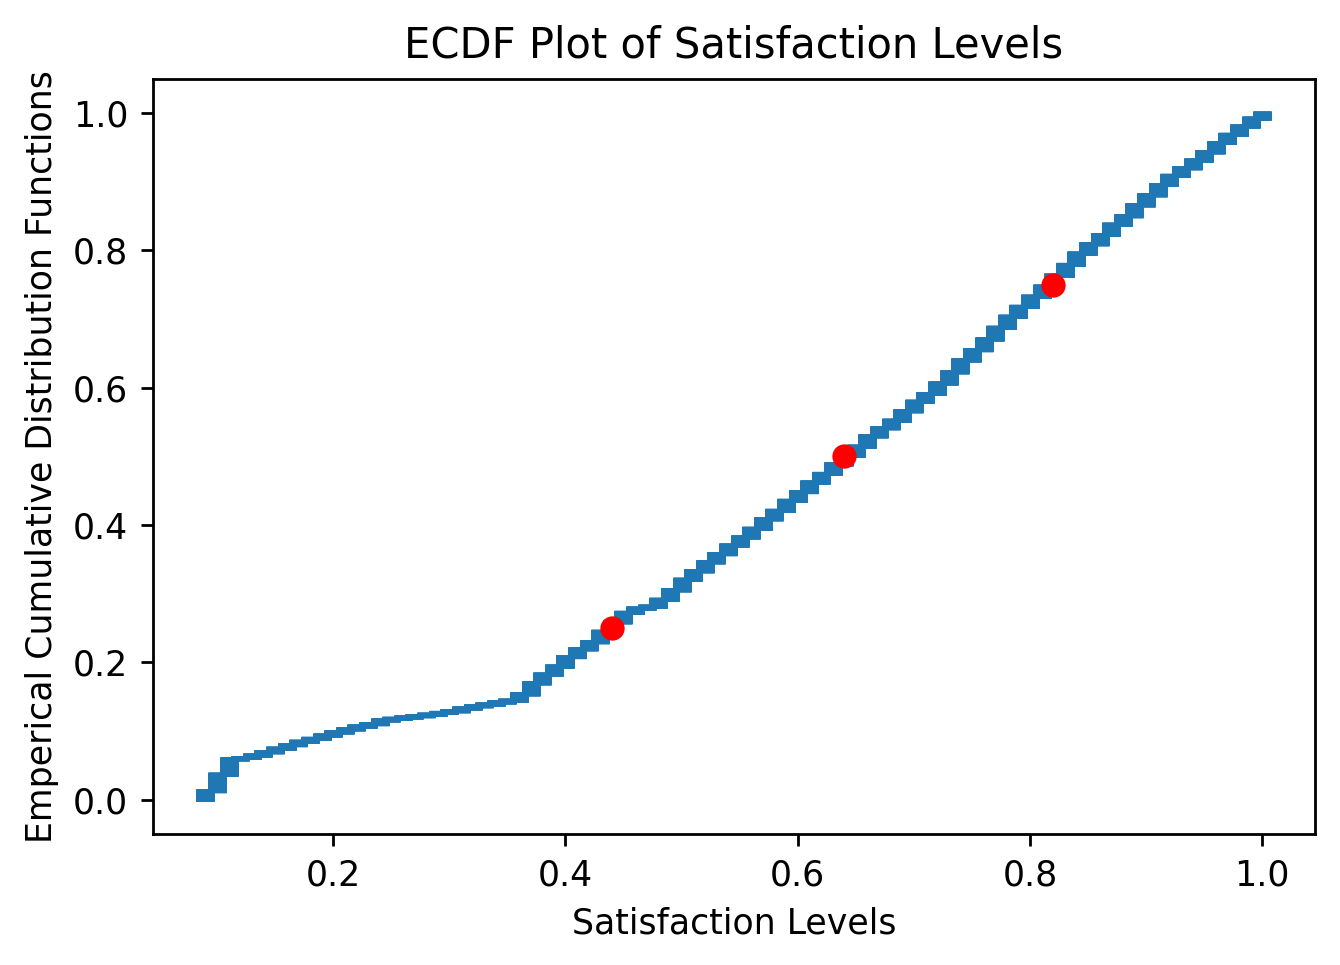

In [ ]:
percentiles = np.array([25,50,75])
ranges = np.percentile(df['satisfaction_level'], percentiles)
x = np.sort(df['satisfaction_level'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x,y,marker='_', linestyle='none', markersize=5)
_ = plt.plot(ranges, percentiles / 100, marker='o', 
             color='red', linestyle='none')  
plt.xlabel('Satisfaction Levels', fontsize=10)
plt.ylabel('Emperical Cumulative Distribution Functions',
           fontsize=10)
plt.grid(False)
plt.title('ECDF Plot of Satisfaction Levels', fontsize=12)
plt.show()

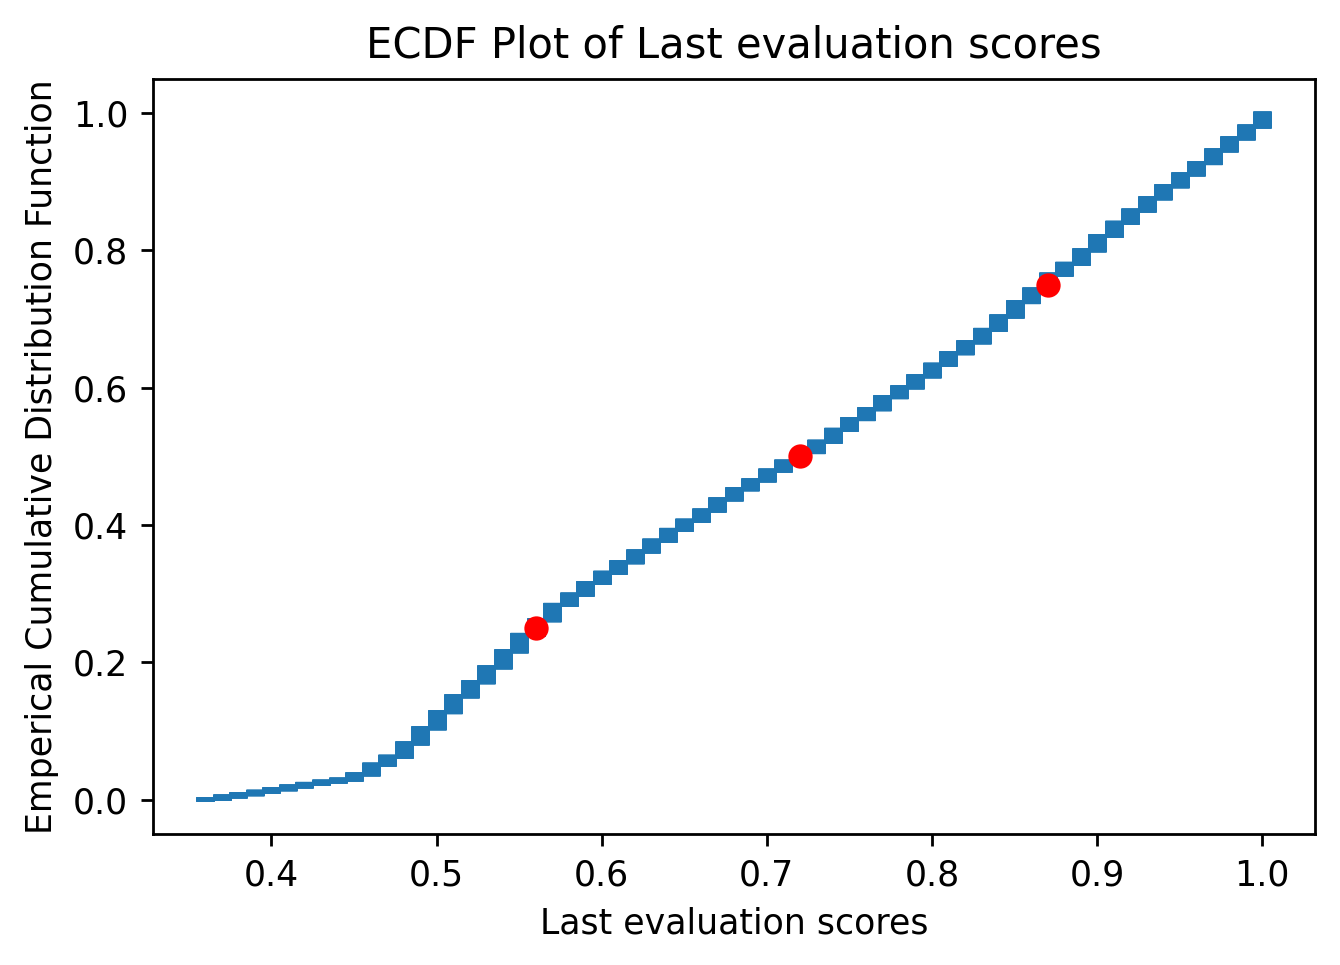

In [ ]:
'''
ECDF plot for last evaluation scores
'''
ranges = np.percentile(df['last_evaluation'], percentiles)
x = np.sort(df['last_evaluation'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='_', linestyle='none', markersize=5)
_ = plt.plot(ranges, percentiles / 100, marker='o',
             color='red', linestyle='none')
plt.grid(False)
plt.xlabel('Last evaluation scores', fontsize=10)
plt.ylabel('Emperical Cumulative Distribution Function',
           fontsize=10)
plt.title('ECDF Plot of Last evaluation scores',fontsize=12)
plt.show()

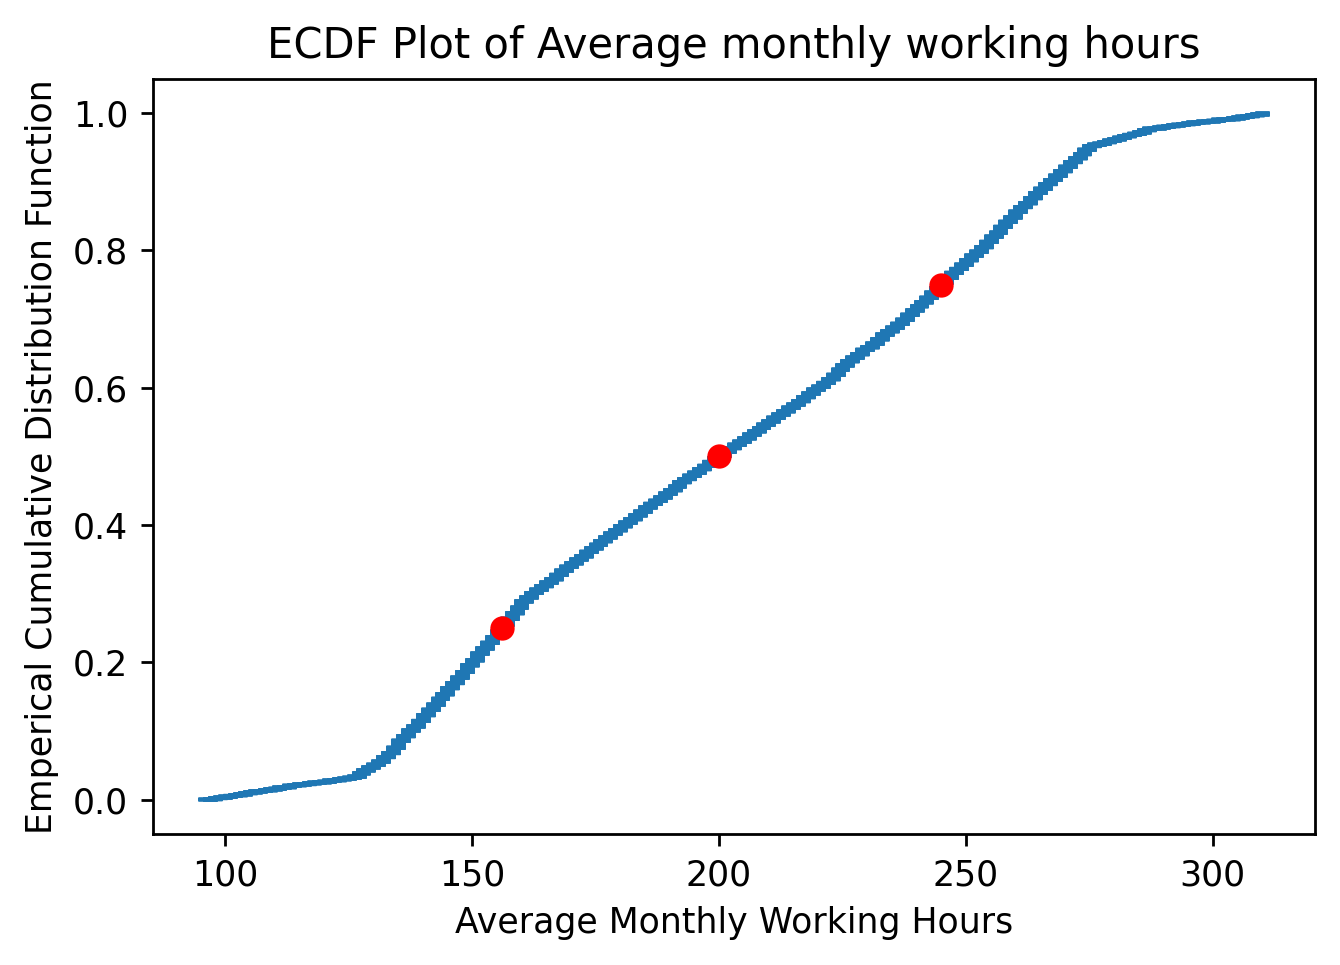

In [ ]:
'''
ECDF plot for average monthly working hours.
'''
ranges = np.percentile(df['average_montly_hours'], percentiles)
x = np.sort(df['average_montly_hours'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='_', linestyle='none',markersize=4)
_ = plt.plot(ranges, percentiles / 100, marker='o',
             color='red', linestyle='none')
plt.grid(False)
plt.xlabel('Average Monthly Working Hours', fontsize=10)
plt.ylabel('Emperical Cumulative Distribution Function',
           fontsize=10)
plt.title('ECDF Plot of Average monthly working hours',
          fontsize=12)
plt.show()

From the ECDF plot for satisfaction levels we can understand that the mean satisfaction levels in the firm are slightly above average(0.67). We can also observe that the lower 25th percentile of satisfaction levels are not that low (0.45). Employees seem pretty satisfied in the firm.

The last evaluation scores in the firm are also quite high and all above average for the 25th, 50th and 75th percentiles.

The employees in the firm worked 200 hours every month on average with the ECDF plot following a normal distribution.

In [ ]:
def ecdf(val):
    n = len(val)
    x = np.sort(val)
    y = np.arange(1, n+1) / n
    return x, y

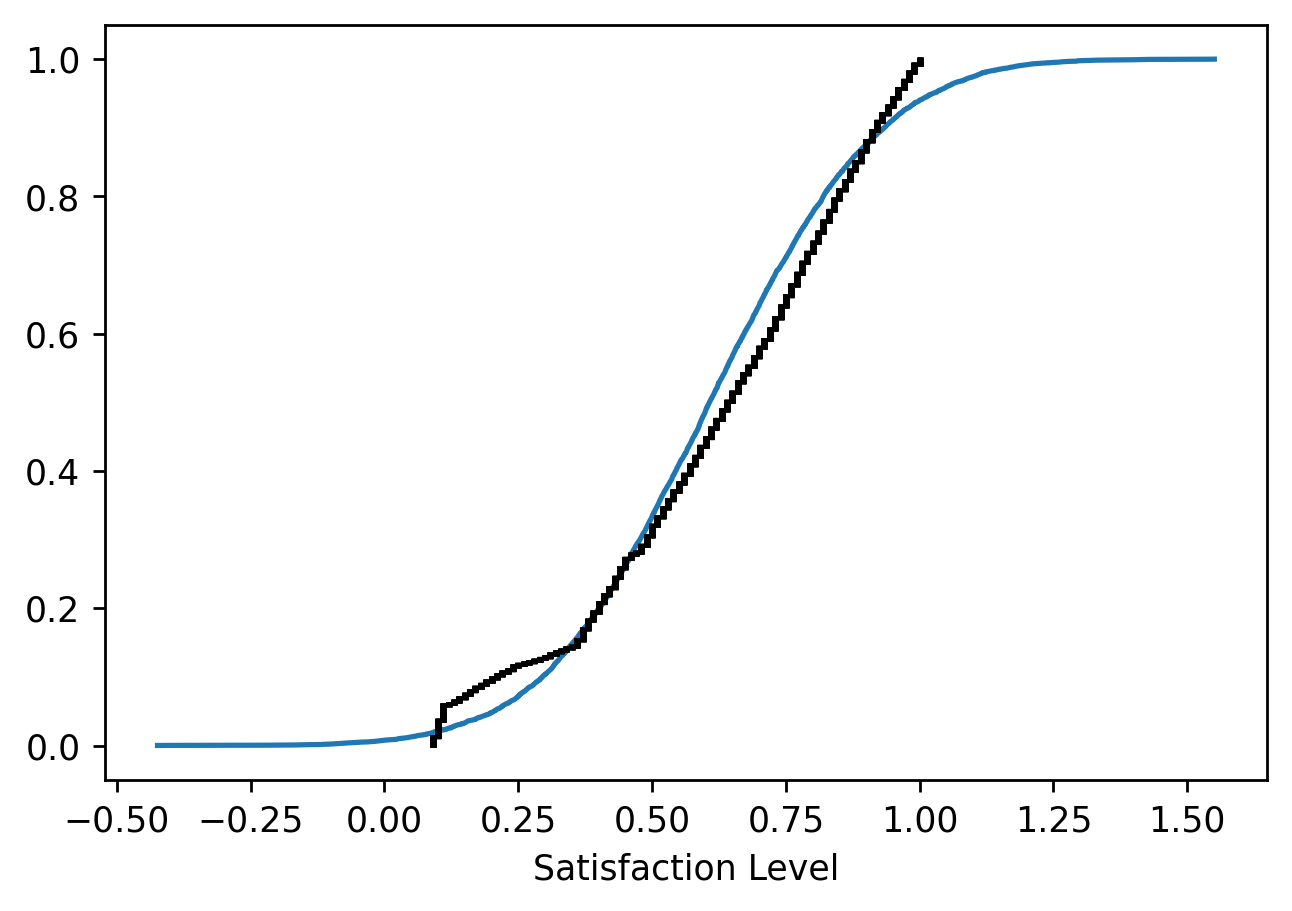

In [ ]:
mean = np.mean(df['satisfaction_level'])
std = np.std(df['satisfaction_level'])
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df['satisfaction_level'])
x_hat, y_hat = ecdf(samples)
plt.figure(dpi=250)
_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x,y, marker='_', linestyle='none',
             markersize=2, color='black')
plt.xlabel('Satisfaction Level')
plt.show()

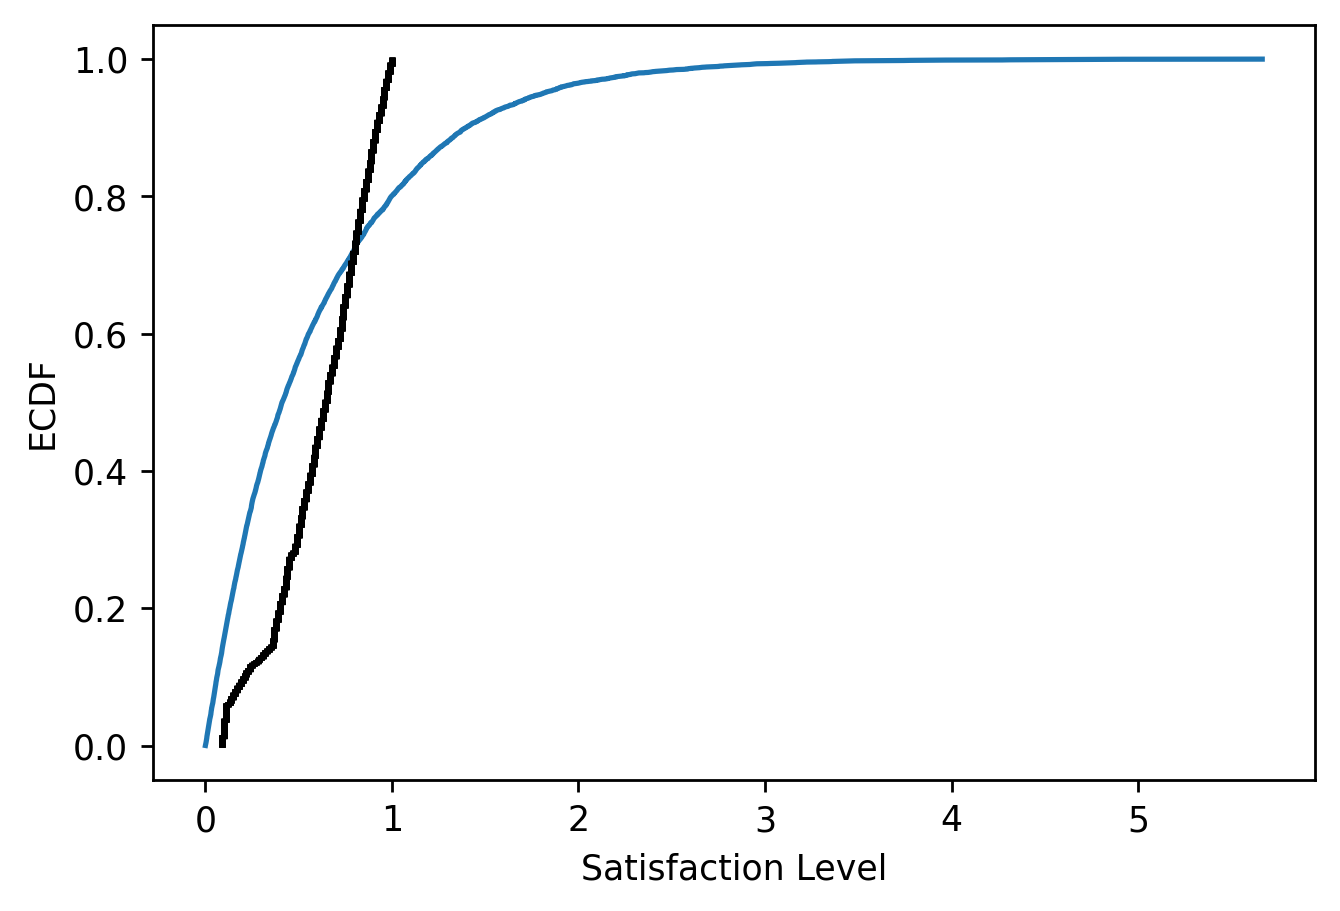

In [ ]:
mean = np.mean(df['satisfaction_level'])
std = np.std(df['satisfaction_level'])
samples = np.random.exponential(mean,size=10000)
x, y = ecdf(df['satisfaction_level'])
x_hat, y_hat = ecdf(samples)
plt.figure(dpi=250)
_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x,y, marker='_', linestyle='none',
             markersize=2, color='black')
plt.xlabel('Satisfaction Level')
plt.ylabel('ECDF')
plt.show()

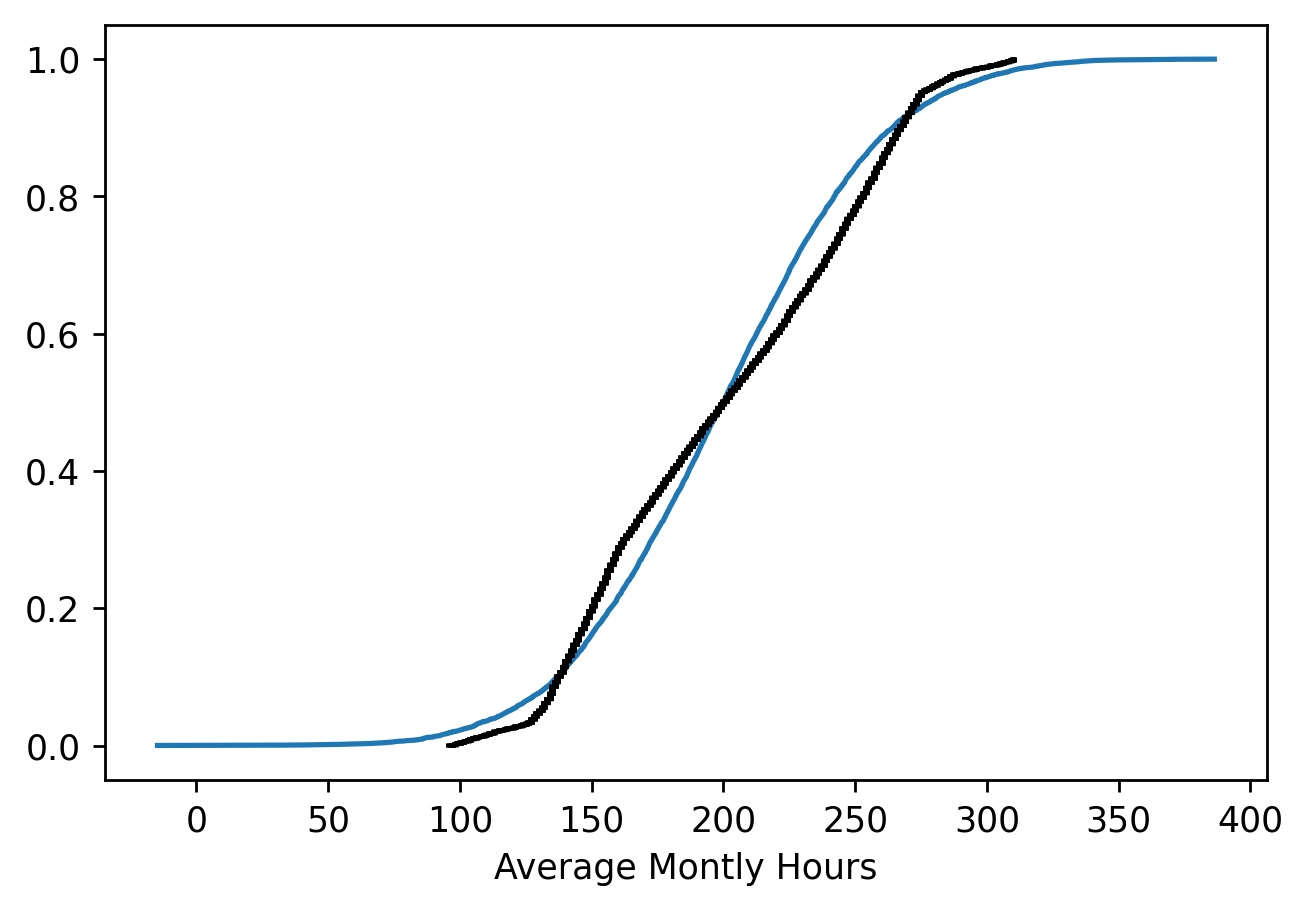

In [ ]:
mean = np.mean(df['average_montly_hours'])
std = np.std(df['average_montly_hours'])
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df['average_montly_hours'])
x_hat, y_hat = ecdf(samples)
plt.figure(dpi=250)
_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x,y, marker='_', linestyle='none',
             markersize=2, color='black')
plt.xlabel('Average Montly Hours')
plt.show()

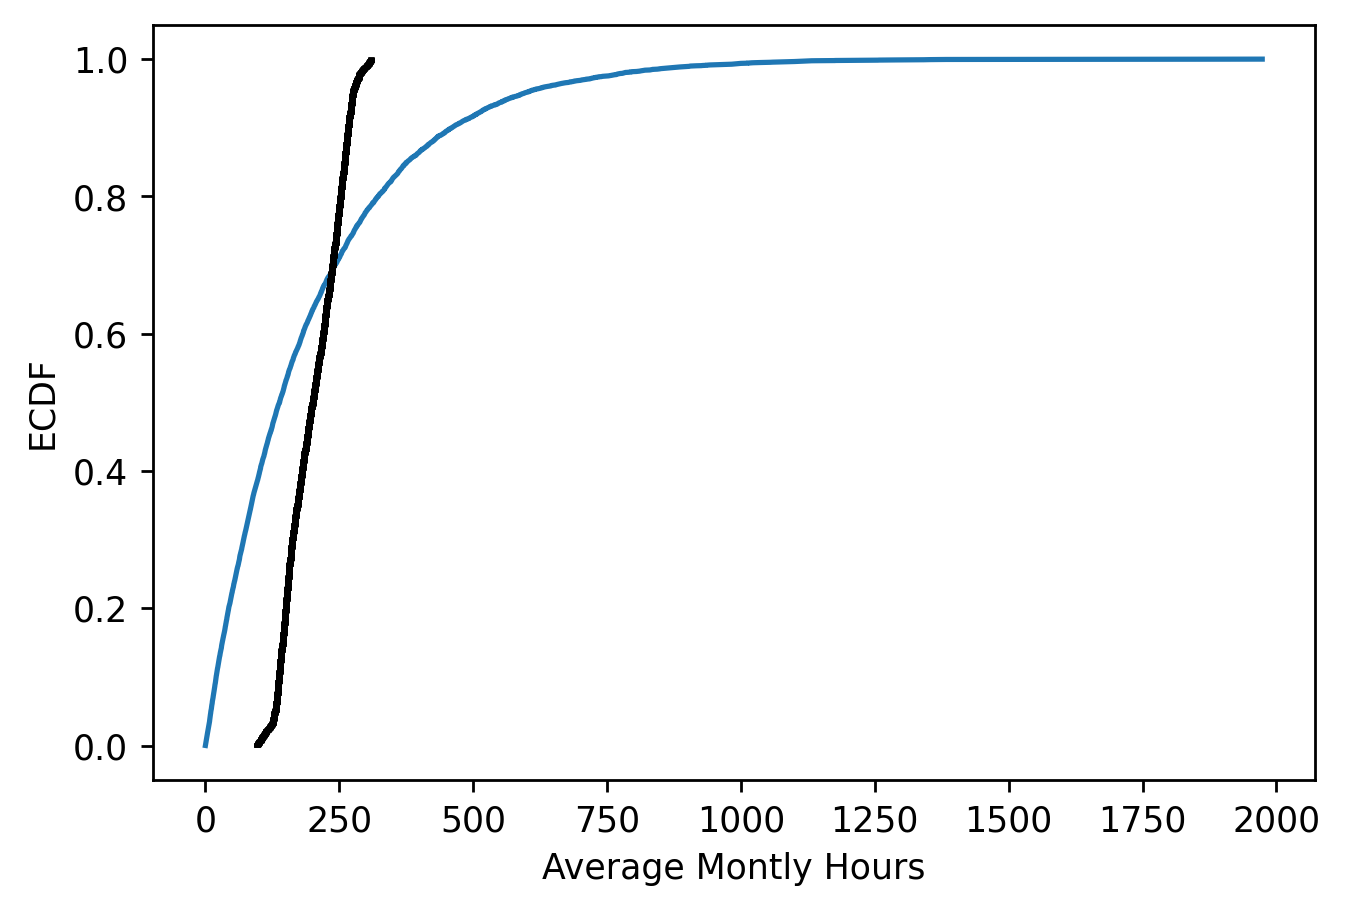

In [ ]:
mean = np.mean(df['average_montly_hours'])
std = np.std(df['average_montly_hours'])
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(df['average_montly_hours'])
x_hat, y_hat = ecdf(samples)
plt.figure(dpi=250)
_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x,y, marker='_', linestyle='none',
             markersize=2, color='black')
plt.xlabel('Average Montly Hours')
plt.ylabel('ECDF')
plt.show()

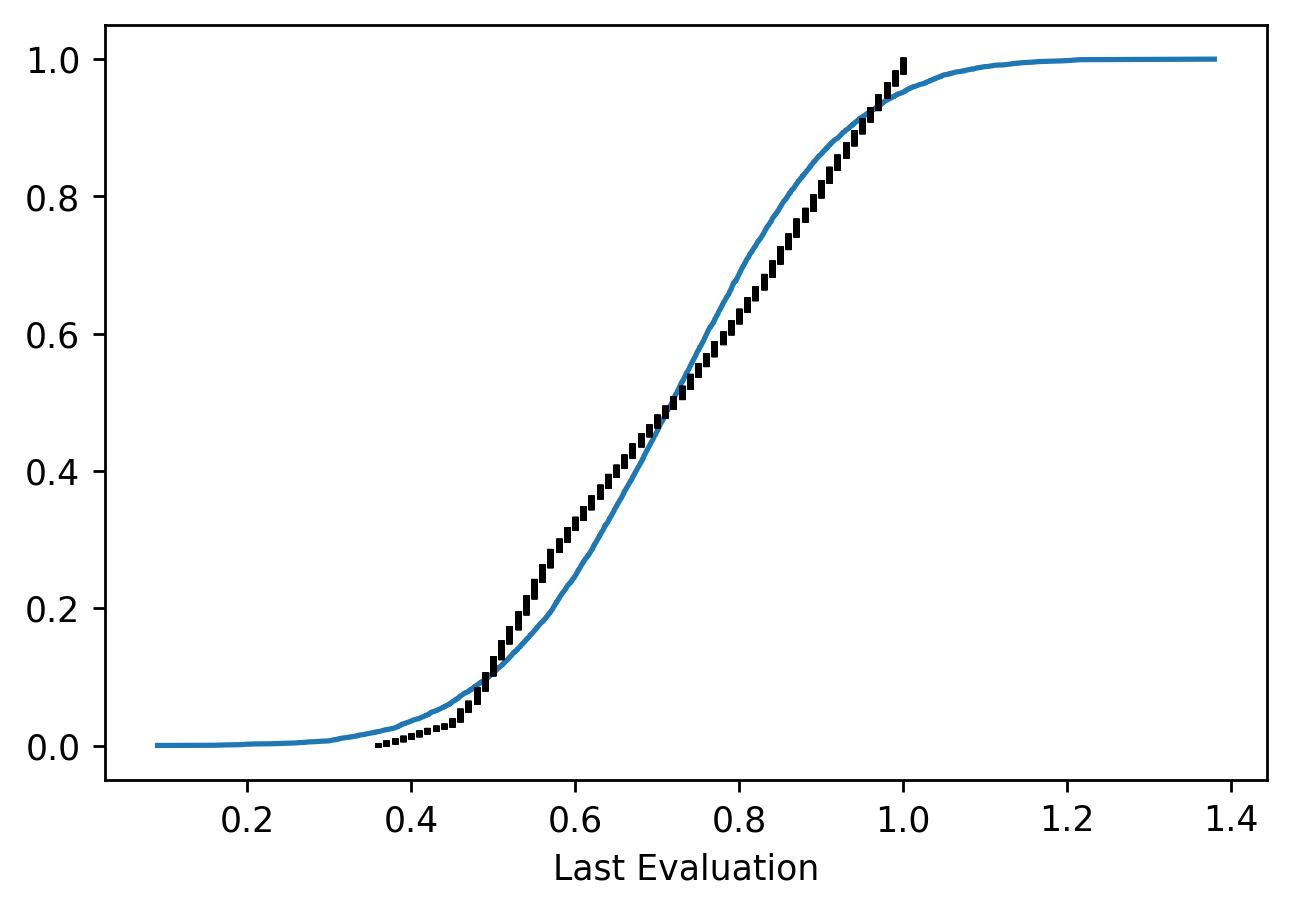

In [ ]:
mean = np.mean(df['last_evaluation'])
std = np.std(df['last_evaluation'])
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(df['last_evaluation'])
x_hat, y_hat = ecdf(samples)
plt.figure(dpi=250)
_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x,y, marker='_', linestyle='none',
             markersize=2, color='black')
plt.xlabel('Last Evaluation')
plt.show()

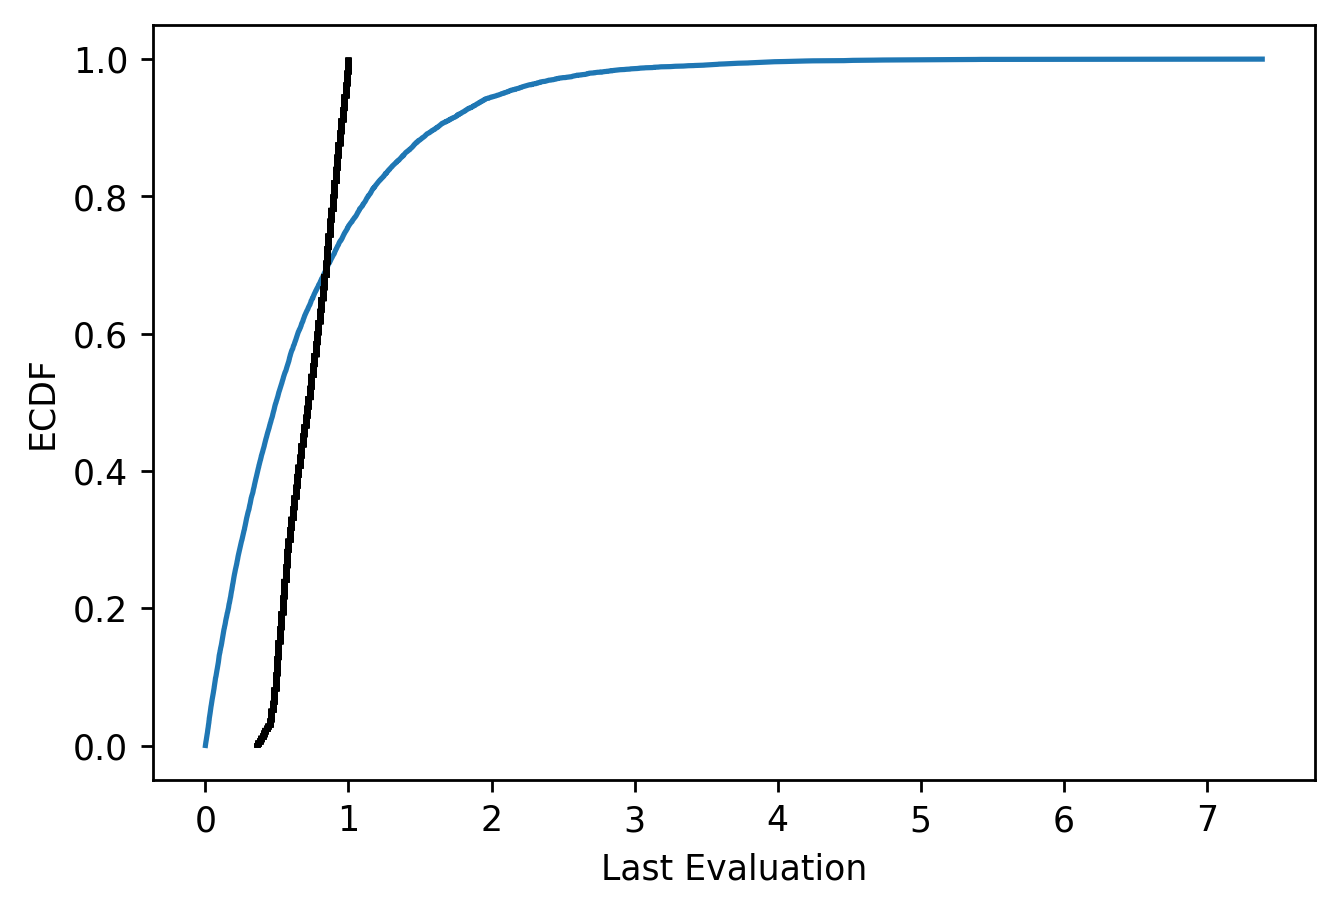

In [ ]:
mean = np.mean(df['last_evaluation'])
std = np.std(df['last_evaluation'])
samples = np.random.exponential(mean, size=10000)
x, y = ecdf(df['last_evaluation'])
x_hat, y_hat = ecdf(samples)
plt.figure(dpi=250)
_ = plt.plot(x_hat, y_hat)
_ = plt.plot(x,y, marker='_', linestyle='none',
             markersize=2, color='black')
plt.xlabel('Last Evaluation')
plt.ylabel('ECDF')
plt.show()

In [ ]:
numerical_features = [
    col for col in df.columns\
    if np.issubdtype(df[col].dtype, np.number)
]
print(numerical_features)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


In [ ]:
categorical_features = [
    col for col in df.columns\
    if pd.api.types.is_string_dtype(df[col])
]
categorical_features

['work_accident', 'left', 'promotion_last_5years', 'department', 'salary']

In [ ]:
df.head(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,no,yes,no,sales,low
1,0.80,0.86,5,262,6,no,yes,no,sales,medium
2,0.11,0.88,7,272,4,no,yes,no,sales,medium


## Hypothesis Testing:

In [ ]:
from scipy.stats import ttest_ind

def test_means(df, col):
    yes_mask = df['left'] == 'yes'
    values_yes = df[col][yes_mask]
    values_no = df[col][~yes_mask]
    mean_yes = values_yes.mean()
    mean_no = values_no.mean()

    ttest_val = ttest_ind(values_yes, values_no)
    
    return [ col, mean_yes, mean_no,\
            round(ttest_val[0], 3),\
            round(ttest_val[1], 3)]

In [ ]:
test_df = pd.DataFrame(columns=[
    'Column', 'Mean Yes', 'Mean No',
    'T-test Stat', 'T-test P-Val'
])
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_means(df, col)

test_df

,Column,Mean Yes,Mean No,T-test Stat,T-test P-Val
0,satisfaction_level,0.440098,0.666810,-51.613,0.000
1,last_evaluation,0.718113,0.715473,0.804,0.421
2,number_project,3.855503,3.786664,2.914,0.004
3,average_montly_hours,207.419210,199.060203,8.752,0.000
4,time_spend_company,3.876505,3.380032,17.924,0.000


## Hypothese Test of Difference of Distribution:

In [ ]:
from scipy.stats import ks_2samp

def test_ks(df, col):
    yes_mask = df['left']=='yes'
    values_yes = df[col][yes_mask]
    values_no = df[col][~yes_mask]

    kstest_val = ks_2samp(values_yes, values_no)
    return [col, round(kstest_val[0],3),\
            round(kstest_val[1],3)]

In [ ]:
test_df = pd.DataFrame(columns=[
    'Column', 'KS Stat', 'KS P-val'
])
for index, col in enumerate(numerical_features):
    test_df.loc[index] = test_ks(df, col)
test_df

,Column,KS Stat,KS P-val
0,satisfaction_level,0.564,0.0
1,last_evaluation,0.213,0.0
2,number_project,0.367,0.0
3,average_montly_hours,0.199,0.0
4,time_spend_company,0.264,0.0


## Machine Learning: Data Preparation

In [ ]:
df['salary'] = df['salary'].astype('category').cat.codes
df['left'] = df['left'].astype('category').cat.codes
df['department'] = df['department'].astype('category').cat.codes
df['left'] = df['left'].astype('category').cat.codes
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category').cat.codes
df['work_accident'] = df['work_accident'].astype('category').cat.codes
df = df.drop_duplicates()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


features = ['satisfaction_level', 'last_evaluation',
            'number_project','average_montly_hours',
            'time_spend_company', 'work_accident',
            'promotion_last_5years','department','salary']

X_train, X_test, y_train, y_test = train_test_split(
    df[features].values, df['left'].values,
    test_size=0.3, random_state=21
)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Machinne Learning - Suppoer Vector Machines:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

for c in range(10,51,5):
    svm = SVC(C=c, kernel='rbf', gamma='scale',
              random_state=21)
    svm.fit(scaled_X_train, y_train)
    pred = svm.predict(scaled_X_test)
    acc= accuracy_score(y_test, pred)
    print('Accuracy Score %s ->%.3f' %(c,acc*100))

Accuracy Score 10 ->97.026
Accuracy Score 15 ->97.082
Accuracy Score 20 ->97.054
Accuracy Score 25 ->96.971
Accuracy Score 30 ->96.971
Accuracy Score 35 ->96.998
Accuracy Score 40 ->97.054
Accuracy Score 45 ->96.998
Accuracy Score 50 ->96.998


In [ ]:
svm = SVC(C=15, kernel='rbf', gamma='scale', 
          random_state=21)
svm.fit(scaled_X_train, y_train)
pred = svm.predict(scaled_X_test)
con_mat = confusion_matrix(y_test, pred)
print(f'Confusion Maatrix:\n{con_mat}')
print('-'*50)
print('% of Accuracy Score per Class')
scores = con_mat.diagonal() / con_mat.sum(axis=1) * 100
print(f'Left = 0: {scores[0]:.2f}%')
print(f'Left = 1: {scores[1]:.2f}%')

Confusion Maatrix:
[[2939   41]
 [  64  554]]
--------------------------------------------------
% of Accuracy Score per Class
Left = 0: 98.62%
Left = 1: 89.64%


## Machine Learning - K-Nearest Neighbours:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

for n in range(10, 51,5):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(scaled_X_train, y_train)
    pred = knn.predict(scaled_X_test)
    acc= accuracy_score(y_test, pred)
    print('Accuracy Score %s ->%.3f' %(n,acc*100))

Accuracy Score 10 ->96.026
Accuracy Score 15 ->95.414
Accuracy Score 20 ->95.192
Accuracy Score 25 ->94.914
Accuracy Score 30 ->94.580
Accuracy Score 35 ->94.497
Accuracy Score 40 ->94.497
Accuracy Score 45 ->94.441
Accuracy Score 50 ->94.469


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)
con_mat = confusion_matrix(y_test, pred)
print(f'Confusion Maatrix:\n{con_mat}')
print('-'*50)
print('% of Accuracy Score per Class')
scores = con_mat.diagonal() / con_mat.sum(axis=1) * 100
print(f'Left = 0: {scores[0]:.2f}%')
print(f'Left = 1: {scores[1]:.2f}%')

Confusion Maatrix:
[[2903   77]
 [  66  552]]
--------------------------------------------------
% of Accuracy Score per Class
Left = 0: 97.42%
Left = 1: 89.32%


## Machine Learning - Random Forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
all_aucs ={}
for depth in [5,10,20,50]:
    print('Depth: %s' % depth)
    aucs = []

    for x in range(10,201,10):
        rf = RandomForestClassifier(
        n_estimators=x, max_depth=depth,
        random_state=21
        )
        rf.fit(scaled_X_train, y_train)
        pred = rf.predict_proba(scaled_X_test)[:,1]
        auc = roc_auc_score(y_test, pred)
        print('%s -> %.3f' % (x, auc))
        aucs.append(auc)
    all_aucs[depth] = aucs
    print()

Depth: 5
10 -> 0.976
20 -> 0.977
30 -> 0.977
40 -> 0.977
50 -> 0.977
60 -> 0.978
70 -> 0.978
80 -> 0.978
90 -> 0.978
100 -> 0.978
110 -> 0.978
120 -> 0.978
130 -> 0.978
140 -> 0.978
150 -> 0.978
160 -> 0.978
170 -> 0.978
180 -> 0.978
190 -> 0.978
200 -> 0.978

Depth: 10
10 -> 0.978
20 -> 0.983
30 -> 0.983
40 -> 0.983
50 -> 0.983
60 -> 0.983
70 -> 0.983
80 -> 0.983
90 -> 0.983
100 -> 0.983
110 -> 0.983
120 -> 0.983
130 -> 0.983
140 -> 0.983
150 -> 0.983
160 -> 0.983
170 -> 0.983
180 -> 0.983
190 -> 0.983
200 -> 0.983

Depth: 20
10 -> 0.969
20 -> 0.971
30 -> 0.972
40 -> 0.971
50 -> 0.974
60 -> 0.976
70 -> 0.978
80 -> 0.978
90 -> 0.978
100 -> 0.978
110 -> 0.979
120 -> 0.979
130 -> 0.979
140 -> 0.980
150 -> 0.980
160 -> 0.980
170 -> 0.980
180 -> 0.980
190 -> 0.980
200 -> 0.981

Depth: 50
10 -> 0.969
20 -> 0.972
30 -> 0.972
40 -> 0.972
50 -> 0.975
60 -> 0.977
70 -> 0.978
80 -> 0.978
90 -> 0.978
100 -> 0.978
110 -> 0.979
120 -> 0.979
130 -> 0.980
140 -> 0.980
150 -> 0.980
160 -> 0.980
170 ->

In [ ]:
rf = RandomForestClassifier(
    max_depth=10, n_estimators=20, 
    random_state=21
)
rf.fit(scaled_X_train, y_train)
pred = rf.predict(scaled_X_test)
con_mat = confusion_matrix(y_test, pred)
print(f'Confusion Maatrix:\n{con_mat}')
print('-'*50)
print('% of Accuracy Score per Class')
scores = con_mat.diagonal() / con_mat.sum(axis=1) * 100
print(f'Left = 0: {scores[0]:.2f}%')
print(f'Left = 1: {scores[1]:.2f}%')

Confusion Maatrix:
[[2975    5]
 [  51  567]]
--------------------------------------------------
% of Accuracy Score per Class
Left = 0: 99.83%
Left = 1: 91.75%


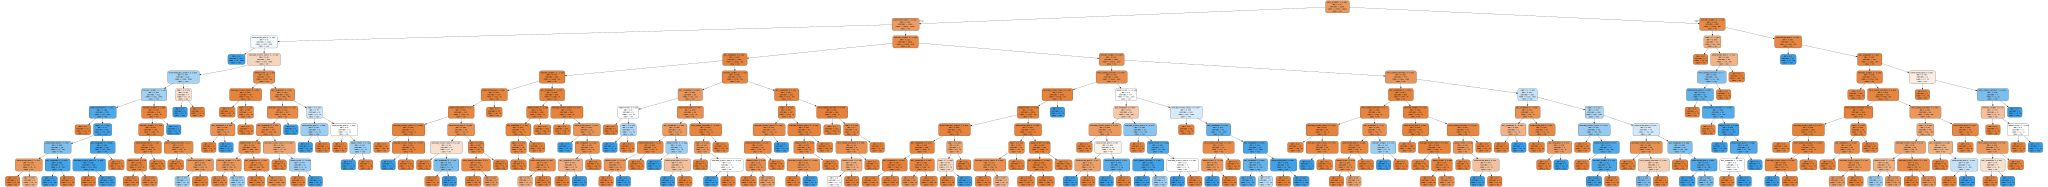

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(rf.estimators_[0],
                           out_file=None,
                           feature_names=features,
                           class_names=['no','yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph= graphviz.Source(dot_data)
graph